<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Utility-Functions" data-toc-modified-id="Utility-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Utility Functions</a></span></li><li><span><a href="#Experiment-1:-Can-we-find-the-true-GIA-model-when-GMSL-is-not-equal-to-Wael?" data-toc-modified-id="Experiment-1:-Can-we-find-the-true-GIA-model-when-GMSL-is-not-equal-to-Wael?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Experiment 1: Can we find the true GIA model when GMSL is not equal to Wael?</a></span><ul class="toc-item"><li><span><a href="#True-GIA-Model:" data-toc-modified-id="True-GIA-Model:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>True GIA Model:</a></span></li><li><span><a href="#Look-at-TRUE-GIA-model-output" data-toc-modified-id="Look-at-TRUE-GIA-model-output-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Look at TRUE GIA model output</a></span></li><li><span><a href="#Generate-'data'-from-true-GIA-model-(varying-age-and-location)." data-toc-modified-id="Generate-'data'-from-true-GIA-model-(varying-age-and-location).-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Generate 'data' from true GIA model (varying age and location).</a></span></li><li><span><a href="#Infer-GMSL" data-toc-modified-id="Infer-GMSL-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Infer GMSL</a></span></li><li><span><a href="#Calculate-relative-model-weights-for-all-inferences" data-toc-modified-id="Calculate-relative-model-weights-for-all-inferences-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Calculate relative model weights for all inferences</a></span><ul class="toc-item"><li><span><a href="#Add-GIA-model-parameters-and-identify-TRUE-model-in-Dataframe" data-toc-modified-id="Add-GIA-model-parameters-and-identify-TRUE-model-in-Dataframe-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Add GIA model parameters and identify TRUE model in Dataframe</a></span></li><li><span><a href="#Save-dataframe-as-csv" data-toc-modified-id="Save-dataframe-as-csv-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Save dataframe as csv</a></span></li></ul></li><li><span><a href="#Summary-figure-showing-model-weightings-for-all-216-GIA-models" data-toc-modified-id="Summary-figure-showing-model-weightings-for-all-216-GIA-models-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Summary figure showing model weightings for all 216 GIA models</a></span></li><li><span><a href="#Use-the-weightings-to-make-a-combined-GMSL-inference" data-toc-modified-id="Use-the-weightings-to-make-a-combined-GMSL-inference-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Use the weightings to make a combined GMSL inference</a></span><ul class="toc-item"><li><span><a href="#Generate-predictions-from-gaussian-process-posterior-for-top-models" data-toc-modified-id="Generate-predictions-from-gaussian-process-posterior-for-top-models-3.7.1"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span>Generate predictions from gaussian process posterior for top models</a></span></li><li><span><a href="#Generate-a-weighted-prediction" data-toc-modified-id="Generate-a-weighted-prediction-3.7.2"><span class="toc-item-num">3.7.2&nbsp;&nbsp;</span>Generate a weighted prediction</a></span></li><li><span><a href="#Plot-predictions-from-the-TRUE-GIA-model-and-the-weighted-metamodel" data-toc-modified-id="Plot-predictions-from-the-TRUE-GIA-model-and-the-weighted-metamodel-3.7.3"><span class="toc-item-num">3.7.3&nbsp;&nbsp;</span>Plot predictions from the TRUE GIA model and the weighted metamodel</a></span></li></ul></li></ul></li><li><span><a href="#Experiment-2:-Can-we-find-the-true-GIA-model-when-GMSL-is-not-equal-to-Wael?" data-toc-modified-id="Experiment-2:-Can-we-find-the-true-GIA-model-when-GMSL-is-not-equal-to-Wael?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Experiment 2: Can we find the true GIA model when GMSL is not equal to Wael?</a></span></li><li><span><a href="#Real-Data" data-toc-modified-id="Real-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Real Data</a></span><ul class="toc-item"><li><span><a href="#Elevation-observation--=-GMSL-+-GIA" data-toc-modified-id="Elevation-observation--=-GMSL-+-GIA-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Elevation observation  = GMSL + GIA</a></span></li></ul></li><li><span><a href="#workspace" data-toc-modified-id="workspace-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>workspace</a></span></li><li><span><a href="#Old-scribbles..-can-scrap-on-clean-up" data-toc-modified-id="Old-scribbles..-can-scrap-on-clean-up-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Old scribbles.. can scrap on clean up</a></span></li></ul></div>

# Imports

In [1]:
import numpy as np
from scipy.interpolate import interp1d, UnivariateSpline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from scipy import ndimage
import arviz as az
import pandas as pd
from scipy.io import loadmat

%matplotlib inline
import seaborn as sns
from PIL import Image

sns.set_style("ticks")
sns.set_context("talk")
import pymc3 as pm

from pathlib import Path

PROJECT_ROOT = Path.cwd().parents[0]
model_dir = PROJECT_ROOT / "model_outputs/"
data_dir = PROJECT_ROOT / "data/"
import warnings

warnings.filterwarnings("ignore")
from IPython.display import clear_output

import theano.tensor as tt
from theano import shared
from pymc3.distributions.dist_math import SplineWrapper



# Utility Functions 
modified from bahamas-gia -- eventually port to utils.py file

In [46]:
def weighted_trace(pred_list, weights):
    new_weights = np.repeat(weights, pred_list[0]["f_pred"].shape[0], axis=0)
    new_weights = new_weights.astype(float)
    new_weights = new_weights / np.sum(new_weights)
    test = [p["f_pred"] for p in pred_list]
    C = np.random.choice(np.arange(np.vstack(test).shape[0]), 10000, p=new_weights)
    weighted_trace = np.vstack(test)[C, :]
    
    return weighted_trace


def inference_model(data, z_functions):
    with pm.Model() as model:
        age_sd = pm.Normal("age_sd", 0, 1, shape=(data["lat"].size))
        age = pm.Deterministic(
            "age", shared(data["age"]) + age_sd * shared(data["age_uncertainty"])
        )  # reshaped to improve Hamiltonian Monte Carlo
        matern_ls = pm.HalfNormal("matern_ls", 20)
        matern_var = pm.HalfNormal("matern_var", 10)
        m_gmsl = pm.Normal("m_gmsl", 0, 20)
        mean_fun = pm.gp.mean.Constant(m_gmsl)
        cov = matern_var * pm.gp.cov.Matern52(1, matern_ls)
        gp = pm.gp.Marginal(mean_func=mean_fun, cov_func=cov)
        GIA = tt.zeros(data["lat"].size, dtype="float64")
        for i in range(data["lat"].size):
            GIA = tt.set_subtensor(GIA[i], SplineWrapper(z_functions[i])(age[i]))
        gia_collect = pm.Deterministic(
            "GIA", GIA
        )  # samples of GIA model RSL (includes Wael)
        gmsl_inference = gp.marginal_likelihood(
            "gmsl",
            X=age[:, np.newaxis],
            y=data["elevation"] - GIA.flatten(),
            shape=((N),),
            noise=data["elevation_uncertainty"],
        )  # GMSL deviation from Wael
        trace = pm.sample(init="adapt_full", progressbar=True, cores=4)
        az_trace = az.convert_to_inference_data(trace)
    return az_trace, trace, model, gp

def interpolation_functions(LAT, LON, GIA_MODEL, ESL, ESL_AGE):
    island_Zs = [
        [lookup_z(lat, lon, m, model_dims) for lat, lon in zip(LAT, LON)]
        for m in GIA_MODEL
    ]

    island_Zs = np.array(island_Zs)
    
    ESL[(ESL_AGE>=LIG_END) & (ESL_AGE<=LIG_START)]=0 #remove GIA splice

    Zfuns = []
    for k in range(island_Zs.shape[1]):
        RSL=np.copy(ESL)
        gia_function=interp1d(np.arange(115, 131), island_Zs[:, k]) #age resolution different than gia models
        RSL[(ESL_AGE>=LIG_END) & (ESL_AGE<=LIG_START)]=gia_function(ESL_AGE[(ESL_AGE>=LIG_END) & (ESL_AGE<=LIG_START)]) #splice in GIA
        
        Zfuns.append(
            UnivariateSpline(ESL_AGE, RSL, k=1, ext=3, s=0)
        )  ## 3 returns boundary value at extrapolation

    return Zfuns

def model_import():
    """
    Imports all GIA models from model_outputs/get_GIA.
    Parameters
    ----------
    Returns
    -------
    models: list containing each GIA model
    model_names: name of each model
    litho: lithosphere thickness for each model
    lower: the lower mantle viscosity of each model
    upper: the upper mantle viscosity of each model
    model_dims: The real word lat/lon dimensions of the model. [left, right, top, bottom]
    """
    import pandas as pd
    from scipy.interpolate import interp1d


    lats = pd.read_csv(model_dir / "lats", delimiter=",", header=None)
    lons = pd.read_csv(model_dir / "lons", delimiter=",", header=None)
    directory = model_dir / "get_GIA/"
    age = np.arange(115, 131, 1)

    extent = [0, 1, 0, 1]
    model_dims = [
        np.min(lons.values),
        np.max(lons.values),
        np.min(lats.values),
        np.max(lats.values),
    ]
    import os
    import pandas as pd

    files = np.sort(os.listdir(directory))
    files = [f for f in files if f[0] != "."]  # ignores .ds_store from mac osx dir

    model_names = []
    for f in files:
        model_names.append(
            f.split("_")[0]
            + "_"
            + f.split("_")[1]
            + "_"
            + f.split("_")[2]
            + "_"
            + f.split("_")[3]
        )

    num_of_models = np.unique(model_names).size
    model_names = np.unique(model_names)

    
    models = []

    for i in range(0, len(files), int(len(files) / model_names.size)):
        model = []
        for k in range(int(len(files) / model_names.size)):
            model.append(
                pd.read_csv(
                    str(directory) + "/" + files[i + k], delimiter=",", header=None
                )
            )
        models.append(model)
        
    
    #HACKY PATCH as GIA MODEL IS FULL EARTH NOT lat/lon from lat/lon files:
    lon_to_id = interp1d([-180,180],[0,models[0][0].shape[1]])
    lat_to_id = interp1d([-90,90],[0,models[0][0].shape[0]])
    id_lon=lon_to_id(model_dims[:2]).astype(int)
    id_lat=lat_to_id(model_dims[2:]).astype(int)
    
    for m in range(len(models)):
        for k in range(len(models[m])):
            models[m][k] = models[m][k].values[slice(id_lat[0],id_lat[1],1),slice(id_lon[0],id_lon[1],1)]


    import re

    litho = []
    upper = []
    lower = []
    for f in files[0 : -1 : int(len(files) / model_names.size)]:
        litho.append(float(f.split("_")[0][6:8]))
        upper.append(float("0." + (f.split("_")[0][10])) * 10 ** 21)
        lower.append(float(f.split("_")[0][11:]) * 10 ** 21)
    litho = np.array(litho).astype(int)
    lower = np.array(lower).astype(float)
    upper = np.array(upper).astype(float)

    return models, model_names, litho, lower, upper, model_dims


def lookup_z(lat, lon, model, model_dims):
    """
    Returns the RSL prediction at a specific lat, lon, on a specific GIA model timeslice.
    Parameters
    ----------
    lat: Latitude value
    lon: Longitude value
    model: A 2d matrix from a GIA model output representing a single timeslice.
    model_dims: The real word lat/lon dimensions of the model. [left, right, top, bottom]
    Returns
    -------
    The model RSL prediction nearest the lat, lon pair.
    """
    lat_len = model.shape[0]
    lon_len = model.shape[1]
    lon_list = np.linspace(model_dims[0], model_dims[1], lon_len)
    lat_list = np.linspace(model_dims[3], model_dims[2], lat_len)
    lon_id = np.argmin(
        np.abs(np.linspace(model_dims[0], model_dims[1], lon_len) - (lon))
    )
    lat_id = np.argmin(
        np.abs(np.linspace(model_dims[3], model_dims[2], lat_len) - (lat))
    )
    return model[lat_id, lon_id]

Load GIA Models:

In [3]:
models, model_names, litho, lower, upper, model_dims = model_import()

In [45]:
ESL_mat = loadmat(data_dir / "processed/ESL.mat")
Wael = ESL_mat["Wael_S"].ravel()
Wael_T = ESL_mat["Wael_T"].ravel()
Age_ESL = ESL_mat["age_com"].ravel()

LIG_START = 128
LIG_END = 117

Load land area mask:

In [5]:
im = Image.open(data_dir / "images/land_mask.tif")
imarray = np.array(im)
imarray_ext = [-180.00000000000003, 180.00000000000003, -85.05112880000001, 83.6664731]
landzoom = ndimage.zoom(imarray, 2, order=3)
my_grey = cm.Greys_r
my_grey.set_under("k", alpha=0)

# Experiment 1: Can we find the true GIA model when GMSL is not equal to Wael?
* Select a GIA model to be TRUE
* Generate 'data' from that TRUE GIA model
* Add sinusoidal GMSL to the data
* Plug each GIA model into our existing GMSL inference framework
* Compare the weights or information criteria of each model (does the TRUE model win?)
* Use model weightings to make a GMSL inference with ALL models

## True GIA Model:
Select one of the real GIA models as 'True'

In [8]:
np.random.seed(42)

N = len(model_names)
true_choice = np.random.choice(N, 1)[0]
true_model = models[true_choice]
print("Model " + str(model_names[true_choice]) + " selected as TRUE model.")

np.random.seed()

Model output71Cp37_Colleoni_Wael_S selected as TRUE model.


In [9]:
zoomlevel = 4
i = 13  # age slice
early_LIG = ndimage.zoom(true_model[i], zoomlevel, order=3)
i = 3  # age slice
late_LIG = ndimage.zoom(true_model[i], zoomlevel, order=3)

## Look at TRUE GIA model output

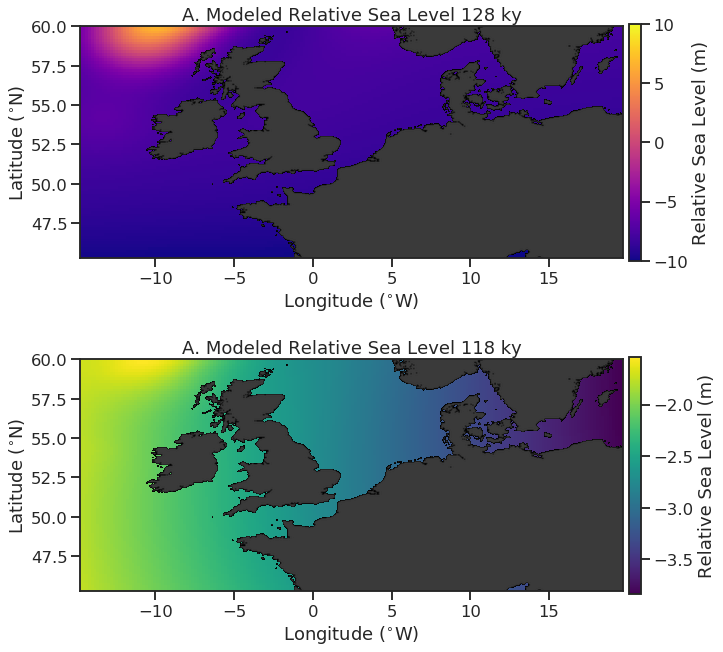

In [10]:
fig = plt.figure(figsize=(10, 9))
plt.subplot(2, 1, 1)
shrink = 0.9
plt.imshow(
    early_LIG,
    interpolation="nearest",
    cmap="plasma",
    extent=model_dims,
    vmin=-10,vmax=10
)
plt.colorbar(
    shrink=shrink,
    pad=0.01,
    label="Relative Sea Level (m)",
)
my_grey = cm.Greys_r
my_grey.set_under("k", alpha=0)
plt.imshow(
    landzoom,
    interpolation="gaussian",
    cmap=my_grey,
    vmin=0.1,
    vmax=5,
    extent=imarray_ext,
)
plt.gca().set_title("A. Modeled Relative Sea Level 128 ky")
plt.gca().grid(False)
plt.gca().set_xlim([model_dims[0], model_dims[1]])
plt.gca().set_ylim([model_dims[2], model_dims[3]])
plt.gca().set_ylabel("Latitude ($^{\circ}$N)")
plt.gca().set_xlabel("Longitude ($^{\circ}$W)")
plt.subplot(2, 1, 2)
plt.imshow(
    late_LIG,
    interpolation="nearest",
    cmap="viridis",
    extent=model_dims,
)
plt.colorbar(
    shrink=shrink,
    pad=0.01,
    label="Relative Sea Level (m)",)
my_grey = cm.Greys_r
my_grey.set_under("k", alpha=0)
plt.imshow(
    landzoom,
    interpolation="gaussian",
    cmap=my_grey,
    vmin=0.1,
    vmax=5,
    extent=imarray_ext,
)
plt.gca().set_title("A. Modeled Relative Sea Level 118 ky")
plt.gca().grid(False)
plt.gca().set_xlim([model_dims[0], model_dims[1]])
plt.gca().set_ylim([model_dims[2], model_dims[3]])
plt.gca().set_ylabel("Latitude ($^{\circ}$N)")
plt.gca().set_xlabel("Longitude ($^{\circ}$W)")
fig.tight_layout(pad=0, w_pad=-2, h_pad=1)


Self reminder for interpretation: subsidence = bottom panel minus the top panel. For example, the orth west corner is -2 at 118 ky and +10 at 128 ky. This area has subsided -12 meters (or uplifted 12 meters). 

## Generate 'data' from true GIA model (varying age and location).

In [12]:
data_number = 17 ## datapoints to generate

In [13]:
data = {}
data["lon"] = np.random.uniform(model_dims[0], model_dims[1], data_number)
data["lat"] = np.random.uniform(model_dims[2], model_dims[3], data_number)
data["age"] = np.random.choice(np.arange(115, 130), data_number, replace=True)
data["age_uncertainty"] = np.ones(data_number) * 0.5
A = np.arange(115, 131, 1)

## no interpolation of age for now, but easy to add (ie ages are all intervals of 1 ky)
Es = []
for i in range(data["lat"].size):
    t_slice = np.where(A == data["age"][i])[0][0]
    Es.append(lookup_z(data["lat"][i], data["lon"][i], true_model[t_slice], model_dims))
data["rsl"] = np.array(Es)
data["elevation_uncertainty"] = np.ones(data_number) * 0.5

Make GMSL during LIG greater than zero and changing:

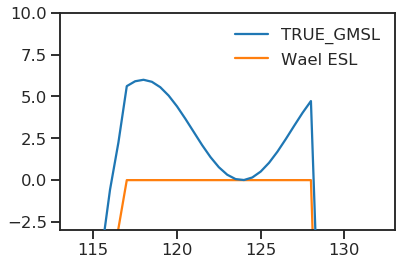

In [15]:
sns.set_context('talk')
LIG = (Age_ESL>=115) & (Age_ESL<=130) 

k=true_choice
GIA_MODEL = models[k]
if '_S' in model_names[k]:
    ESL_CURVE = Wael
if '_T' in model_names[k]:
    ESL_CURVE = Wael_T
    
synth_gmsl = np.copy(ESL_CURVE)
xt=Age_ESL[LIG]-Age_ESL[LIG].min()
synth_gmsl[LIG]=ESL_CURVE[LIG]+3*np.sin(xt/(.6*np.pi))+3
plt.plot(Age_ESL,synth_gmsl,label='TRUE_GMSL',zorder=3)
plt.plot(Age_ESL,ESL_CURVE,label='Wael ESL')
plt.gca().set_xlim([113,133])
plt.gca().set_ylim([-3,10])
plt.legend(loc='best',frameon=False)

In [16]:
synth_gmsl_fun=interp1d(Age_ESL,synth_gmsl)
ESL_CURVE_fun=interp1d(Age_ESL,ESL_CURVE)
synth_gmsl_fun(Age_ESL)

## add true gmsl to RSL model
data['elevation']=np.copy(data['rsl'])
for i in range(data["lat"].size):
    data["elevation"][i] += synth_gmsl_fun(data['age'][i])-ESL_CURVE_fun(data['age'][i])

Look at data:

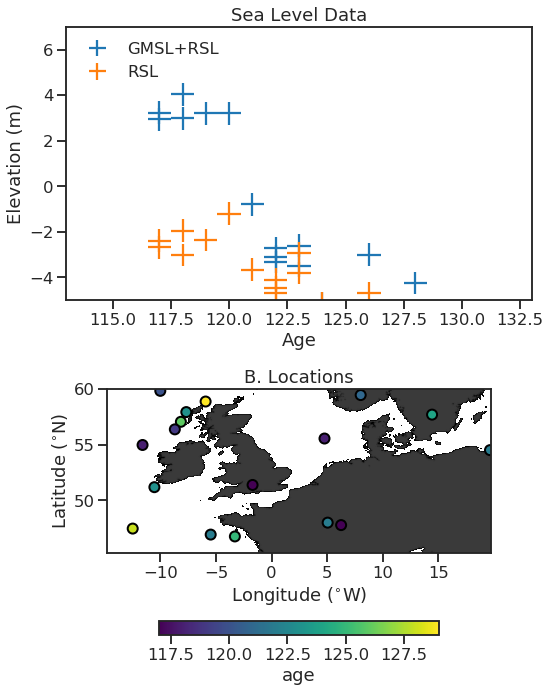

In [17]:
sns.set_context('talk')
fig=plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.errorbar(
    data["age"],
    data["elevation"],
    xerr=data["age_uncertainty"],
    yerr=data["elevation_uncertainty"],
    linestyle="none",label='GMSL+RSL'
)
plt.errorbar(
    data["age"],
    data["rsl"],
    xerr=data["age_uncertainty"],
    yerr=data["elevation_uncertainty"],
    linestyle="none",label='RSL'
)

plt.legend(loc='upper left',frameon=False)



plt.gca().set_xlabel('Age')
plt.gca().set_ylabel('Elevation (m)')
_=plt.gca().set_title('Sea Level Data')
plt.gca().set_xlim([113,133])
plt.gca().set_ylim([-5,7])

plt.subplot(2,1,2)

plt.imshow(
    landzoom,
    interpolation="gaussian",
    cmap=my_grey,
    vmin=0.1,
    vmax=5,
    extent=imarray_ext,
)

plt.scatter(data['lon'],data['lat'],c=data['age'],cmap='viridis',s=100,edgecolor='k',lw=2)
plt.colorbar(label='age',shrink=.6,pad=0.25, orientation="horizontal")
plt.gca().set_title("B. Locations")
plt.gca().grid(False)
plt.gca().set_xlim([model_dims[0], model_dims[1]])
plt.gca().set_ylim([model_dims[2], model_dims[3]])
plt.gca().set_ylabel("Latitude ($^{\circ}$N)")
plt.gca().set_xlabel("Longitude ($^{\circ}$W)")
fig.tight_layout()


## Infer GMSL

In [18]:
def inference_model(data, z_functions):
    with pm.Model() as model:
        age_sd = pm.Normal("age_sd", 0, 1, shape=(data["lat"].size))
        age = pm.Deterministic(
            "age", shared(data["age"]) + age_sd * shared(data["age_uncertainty"])
        )  # reshaped to improve Hamiltonian Monte Carlo
        matern_ls = pm.HalfNormal("matern_ls", 20)
        matern_var = pm.HalfNormal("matern_var", 10)
        m_gmsl = pm.Normal("m_gmsl", 0, 20)
        mean_fun = pm.gp.mean.Constant(m_gmsl)
        cov = matern_var * pm.gp.cov.Matern52(1, matern_ls)
        gp = pm.gp.Marginal(mean_func=mean_fun, cov_func=cov)
        GIA = tt.zeros(data["lat"].size, dtype="float64")
        for i in range(data["lat"].size):
            GIA = tt.set_subtensor(GIA[i], SplineWrapper(z_functions[i])(age[i]))
        gia_collect = pm.Deterministic(
            "GIA", GIA
        )  # samples of GIA model RSL (includes Wael)
        gmsl_inference = gp.marginal_likelihood(
            "gmsl",
            X=age[:, np.newaxis],
            y=data["elevation"] - GIA.flatten(),
            shape=((N),),
            noise=data["elevation_uncertainty"],
        )  # GMSL deviation from Wael
        trace = pm.sample(init="adapt_full", progressbar=True, cores=4)
        az_trace = az.convert_to_inference_data(trace)
    return az_trace, trace, model, gp


In [19]:
N = data["elevation"].size
comparison = {}
stats_models = {}
gps = {}

for k in range(len(model_names)):
    clear_output(wait=True)
    print("running simulation number " + str(k + 1) + " of " + str(len(models)))
    print("running model: " + model_names[k])
    GIA_MODEL = models[k]
    if "_S" in model_names[k]:
        ESL_CURVE = Wael
    if "_T" in model_names[k]:
        ESL_CURVE = Wael_T

    z_functions = interpolation_functions(
        data["lat"], data["lon"], GIA_MODEL, ESL_CURVE, Age_ESL
    )
    az_trace, trace, model, gp = inference_model(data, z_functions)
    comparison[model_names[k]] = az_trace
    stats_models[model_names[k]] = model
    gps[model_names[k]] = gp
     

running simulation number 216 of 216
running model: output96Cp57_Lambeck_Wael_T


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_full...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [m_gmsl, matern_var, matern_ls, age_sd]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


## Calculate relative model weights for all inferences 
We use leave-one-out (loo) cross validation with an Akaike-type weighting. The weights are stabilized using a Bayesian bootstrap. https://arviz-devs.github.io/arviz/generated/arviz.compare.html

In [20]:
comp = pm.compare(comparison, ic="loo", b_samples=100000) #overkill on samples, but it is fast enough

### Add GIA model parameters and identify TRUE model in Dataframe

In [22]:
compare_model_names = comp.index.values
model_params_df = {}
for i in range(len(compare_model_names)):
    md_id = np.where(model_names == compare_model_names[i])[0][0]
    ice_history = compare_model_names[i].split("_")[1]
    esl_curve = compare_model_names[i].split("_")[2]
    deglacial_rate = compare_model_names[i].split("_")[3]
    model_params_df[compare_model_names[i]] = [
        lower[md_id],
        upper[md_id],
        litho[md_id],
        ice_history,
        esl_curve,
        deglacial_rate,
    ]

df2 = pd.DataFrame.from_dict(
    model_params_df,
    orient="index",
    columns=["LMV", "UMV", "lithosphere", "ice_history", "esl_curve", "deglacial_rate"],
)

comp3 = comp.join(df2)

identify = {}
for i in range(len(model_names)):
    if i == true_choice:
        identify[model_names[i]] = True
    else:
        identify[model_names[i]] = False

df3 = pd.DataFrame.from_dict(identify, orient="index", columns=["true_model"],)

comp3 = comp.join(df2).join(df3)


### Save dataframe as csv

In [55]:
comp3.to_csv('true_model_experiment1.csv')

## Summary figure showing model weightings for all 216 GIA models

In [24]:
# one subplot for each experiment
experiments = [
    ["Lambeck", "S", 96],
    ["Colleoni", "S", 96],
    ["ICE6G", "S", 96],
    ["Lambeck", "T", 96],
    ["Colleoni", "T", 96],
    ["ICE6G", "T", 96],
    ["Lambeck", "S", 71],
    ["Colleoni", "S", 71],
    ["ICE6G", "S", 71],
    ["Lambeck", "T", 71],
    ["Colleoni", "T", 71],
    ["ICE6G", "T", 71],
    ["Lambeck", "S", 48],
    ["Colleoni", "S", 48],
    ["ICE6G", "S", 48],
    ["Lambeck", "T", 48],
    ["Colleoni", "T", 48],
    ["ICE6G", "T", 48],
]

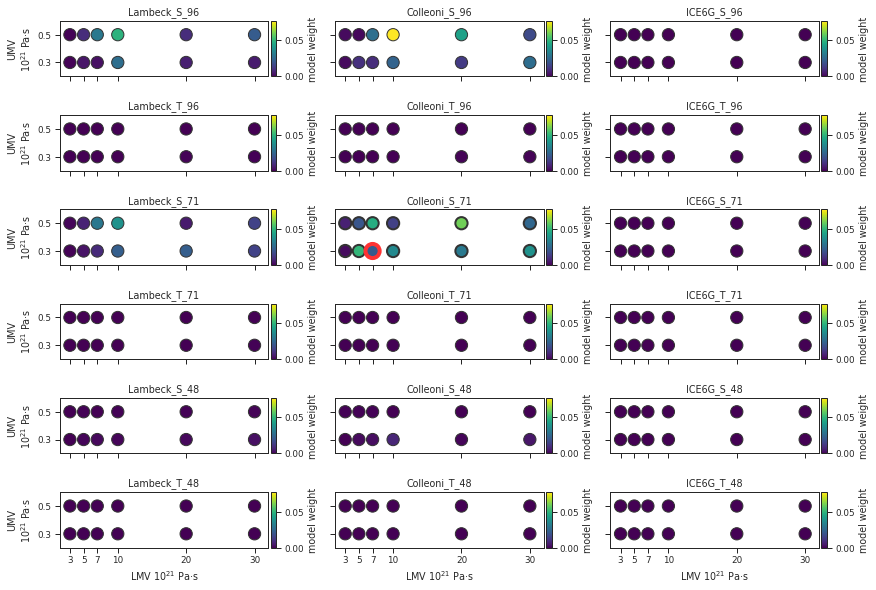

In [33]:
sns.set_context("paper")
fig = plt.figure(figsize=(12, 8))
for i in range(0, 18):
    experiment = experiments[i]
    plt.subplot(6, 3, 1 + i)
    filtered = comp3[
        (comp3.ice_history == experiment[0])
        & (comp3.deglacial_rate == experiment[1])
        & (comp3.lithosphere == experiment[2])
    ]
    if filtered["true_model"].unique().size == 1:
        plt.scatter(
            filtered["LMV"].values,
            filtered["UMV"] / 1e21,
            c=filtered["weight"],
            s=150,
            cmap="viridis",
            edgecolor=(0.2, 0.2, 0.2),
            lw=1,
            vmin=0,
            vmax=comp3["weight"].max(),
            zorder=2,
        )
    else:
        ec = np.dot(
            filtered["true_model"].values.astype(int)[:, np.newaxis],
            np.array([0.8, 0.0, 0.0])[np.newaxis, :],
        )
        ew = filtered["true_model"].values.astype(int) * 2
        s = filtered["true_model"].values.astype(int) * 50
        plt.scatter(
            filtered["LMV"].values,
            filtered["UMV"] / 1e21,
            c=filtered["weight"],
            s=150 + s,
            cmap="viridis",
            edgecolor=np.array([0.2, 0.2, 0.2]) + ec,
            lw=2 + ew,
            vmin=0,
            vmax=comp3["weight"].max(),
            zorder=2,
        )

    plt.colorbar(label="model weight", pad=.01, aspect=10)

    plt.gca().set_xticklabels((np.round(np.unique(lower), 0) / 1e21).astype(int))
    plt.gca().set_yticks(np.unique(upper) / 1e21)
    plt.gca().set_xticks(np.unique(lower))
    plt.gca().set_xlim(1.5e21, 32e21)
    plt.gca().set_ylim(0.2, 0.6)
    if i > 14:
        plt.gca().set_xlabel("LMV $10^{21}$ Pa·s")
    else:
        plt.gca().set_xticklabels([])
    if i % 3 == 0:
        plt.gca().set_ylabel("UMV\n$10^{21}$ Pa·s")
    else:
        plt.gca().set_yticklabels([])

    plt.minorticks_off()
    plt.gca().set_title(experiment[0] + "_" + experiment[1] + "_" + str(experiment[2]))


fig.tight_layout()
fig.tight_layout(pad=0, w_pad=1, h_pad=2)

Each circle represents a GIA model. The color of the circle is the probability that the observations were generated by the model relative to the probability that the observations were generated by any of the other models (the weightings sum to 1). The circle highlighted with a <span style='color:red;font-weight:bold'>RED</span> border is the model that was actually used to generate the data (the 'TRUE' GIA model). Remember that these weightings show similarities between GIA models at the lat/lon, the age of the samples, AND the prescribed GMSL.

## Use the weightings to make a combined GMSL inference
We will never know the 'true' GIA model, but we should include the uncertainty of all of the likely models in our prediction. The weightings offer guidance on how important each model should be in that final inference.

### Generate predictions from gaussian process posterior for top models

In [35]:
# all models with more than 1% weight
top_models = comp3[comp["weight"] > 0.01]["rank"].values
# new timespan to evaluate the gaussian process
X_new = np.linspace(110, 140, 200)[:, np.newaxis]

pred_traces = []  # list to collect all of the predictions
for i in top_models:
    clear_output(wait=True)
    print("sampling model " + str(i + 1) + " of " + str(len(top_models)))
    to_plot = comp3[comp3["rank"] == i].index[0]  # model name (str)
    model = stats_models[to_plot]  # (str) names are used as keys
    gp = gps[to_plot]
    az_trace = comparison[to_plot]

    with model:  # pymc3 model context
        # add conditional to each model (comment out if running this cell twice)
        f_pred = gp.conditional("f_pred", X_new)

    X_new = np.linspace(110, 140, 200)[:, np.newaxis]
    pred_samples = pm.sample_posterior_predictive(
        az_trace.posterior,  # if using pymc3 trace remove '.posterior'
        model=model,
        vars=[f_pred],
        samples=1000,
    )
    pred_traces.append(pred_samples)

sampling model 28 of 28


### Generate a weighted prediction

In [49]:
weights = comp['weight'].values[top_models.astype(int)]
weighted_gmsl_trace = weighted_trace(pred_traces, weights)

### Plot predictions from the TRUE GIA model and the weighted metamodel

Text(0.5, 1.0, 'EU GMSL Inference Experiment')

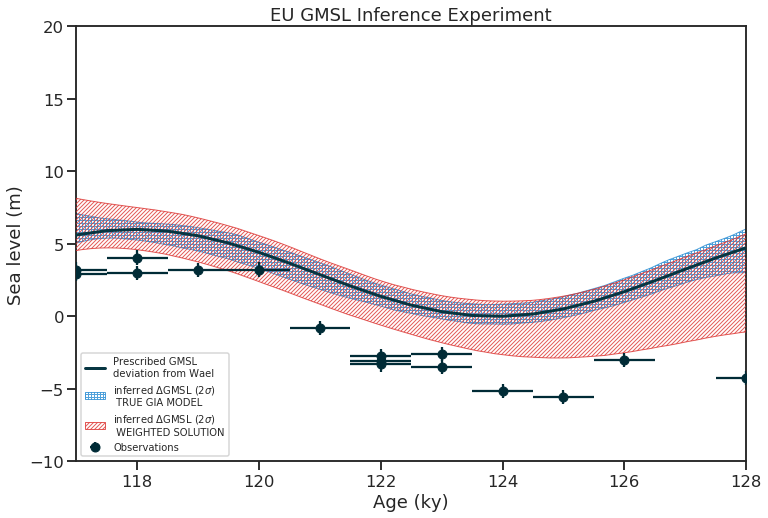

In [54]:
fig = plt.figure(figsize=(12, 8))
sns.set_context("talk")

plt.plot(
    Age_ESL,
    synth_gmsl,
    label="Prescribed GMSL\ndeviation from Wael",
    zorder=3,
    lw=3,
    color="#073642",
)



plt.errorbar(
    data["age"],
    data["elevation"],
    xerr=data["age_uncertainty"],
    yerr=data["elevation_uncertainty"],
    marker="o",
    linestyle="none",
    label="Observations",
    color="#002b36",
    zorder=10,
)


index_of_prediction_from_true = np.where(comp3.index==model_names[true_choice])[0][0]
pred_samples = pred_traces[index_of_prediction_from_true]  
bot = np.percentile(np.array(pred_samples["f_pred"]), 2.5, axis=0)
top = np.percentile(np.array(pred_samples["f_pred"]), 97.5, axis=0)
mean = np.mean(np.array(pred_samples["f_pred"]), axis=0)

plt.gca().fill_between(
    X_new.ravel(),
    bot,
    top,
    fc="none",
    zorder=2,
    alpha=.8,
    label="inferred $\Delta$GMSL (2$\sigma$)\n TRUE GIA MODEL",
    lw=1,
    ec="#268bd2",
    aa=True,
    capstyle="round",
    hatch=r"++++",
)


bot = np.percentile(weighted_gmsl_trace, 2.5, axis=0)
top = np.percentile(weighted_gmsl_trace, 97.5, axis=0)
mean = np.mean(weighted_gmsl_trace, axis=0)

plt.gca().fill_between(
    X_new.ravel(),
    bot,
    top,
    fc="none",
    zorder=3,
    alpha=.8,
    label="inferred $\Delta$GMSL (2$\sigma$)\n WEIGHTED SOLUTION",
    lw=1,
    ec="#dc322f",
    aa=True,
    capstyle="round",
    hatch="//////",
)

plt.gca().set_xlim(LIG_END, LIG_START)
plt.gca().set_ylim(-10, 20)
plt.legend(loc="lower left", frameon=True, fontsize=10)
plt.gca().set_xlabel("Age (ky)")
plt.gca().set_ylabel("Sea level (m)")
plt.gca().set_title("EU GMSL Inference Experiment")

# Experiment 2: Can we find the true GIA model when GMSL is not equal to Wael?
* Select a GIA model to be TRUE
* Generate 'data' from that TRUE GIA model <span style='font-weight:bold;color:red'>Using LAT/LON, RSL error, ages, and age errors from real dataset</span>
* Add sinusoidal GMSL to the data
* Plug each GIA model into our existing GMSL inference framework
* Compare the weights or information criteria of each model (does the TRUE model win?)
* Use model weightings to make a GMSL inference with ALL models

In [490]:
df=pd.read_excel(data_dir/'NWEuropeDatabase_v4.xlsx',header=1)

In [491]:
filtered = df[df['Indicative \nRange'] != '(limiting)']
data = {}
data["lon"] = filtered['Longitude'].dropna().values
data["lat"] = filtered['Latitude'].dropna().values
data["age"] = filtered['Age\n(ka BP)'].dropna().values
data["age_uncertainty"] = filtered['Age Error\n(1σ ka)'].dropna().values
data["elevation"] = filtered['Relative Sea \nLevel (m)'].dropna().values
data["elevation_uncertainty"] = filtered['RSL Error \n(1σ m)'].dropna().values


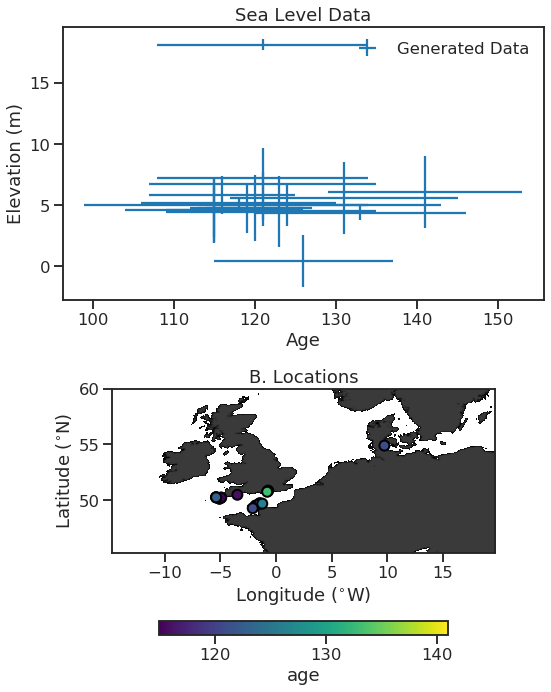

In [493]:
sns.set_context('talk')
fig=plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.errorbar(
    data["age"],
    data["elevation"],
    xerr=data["age_uncertainty"],
    yerr=data["elevation_uncertainty"],
    linestyle="none",label='Generated Data'
)
plt.legend(loc='best',frameon=False)
plt.gca().set_xlabel('Age')
plt.gca().set_ylabel('Elevation (m)')
_=plt.gca().set_title('Sea Level Data')
plt.subplot(2,1,2)
plt.imshow(
    landzoom,
    interpolation="gaussian",
    cmap=my_grey,
    vmin=0.1,
    vmax=5,
    extent=imarray_ext,
)
plt.scatter(data['lon'],data['lat'],c=data['age'],cmap='viridis',s=100,edgecolor='k',lw=2)
plt.colorbar(label='age',shrink=.6,pad=0.25, orientation="horizontal")
plt.gca().set_title("B. Locations")
plt.gca().grid(False)
plt.gca().set_xlim([model_dims[0], model_dims[1]])
plt.gca().set_ylim([model_dims[2], model_dims[3]])
plt.gca().set_ylabel("Latitude ($^{\circ}$N)")
plt.gca().set_xlabel("Longitude ($^{\circ}$W)")
fig.tight_layout()

In [254]:
import theano.tensor as tt
from theano import shared
from pymc3.distributions.dist_math import SplineWrapper


def interpolation_functions(LAT, LON, GIA_MODEL):
    island_Zs = [
        [lookup_z(lat, lon, m, model_dims) for lat, lon in zip(LAT, LON)]
        for m in GIA_MODEL
    ]

    island_Zs = np.array(island_Zs)
    Zfuns = []
    for k in range(island_Zs.shape[1]):
        Zfuns.append(
            UnivariateSpline(np.arange(115, 131), island_Zs[:, k], k=1, ext=3)
        )  ## 3 returns boundary value at extrapolation

    return Zfuns




FromFunctionOp{interpolation_function}.0

In [255]:
N = data["lat"].size
comparison = {}
for k in range(len(models)):
    clear_output(wait=True)
    print("running simulation number " + str(k + 1) + " of " + str(len(models)))
    GIA_MODEL = models[k]
    z_functions = interpolation_functions(data["lat"], data["lon"], GIA_MODEL)

    with pm.Model() as model:
        sd = pm.Normal("sd", 0, 1, shape=(data["lat"].size))
        age = pm.Deterministic(
            "age", shared(data["age"]) + sd * shared(data["age_uncertainty"])
        )

        yls = pm.Gamma("constY", alpha=1, beta=1)  # signal variance
        cov = yls ** 2 * pm.gp.cov.WhiteNoise(1)
        gp = pm.gp.Latent(cov_func=cov)
        gmsl_inference = gp.prior(
            "gmsl", X=age[:, np.newaxis], shape=((N),)
        )  # prior needs to be (n1+n2,)
        GIA = tt.zeros(data["lat"].size, dtype="float64")
        for i in range(data["lat"].size):
            GIA = tt.set_subtensor(GIA[i], SplineWrapper(z_functions[i])(age[i]))

        observations = pm.Deterministic(
            "RSL_estimate", gmsl_inference.flatten() + GIA.flatten()
        )
        sigma = pm.HalfNormal("sigma", sd=15)  # mean of GMSL over interval
        likelihood = pm.Normal(
            "zero",
            mu=observations,
            sd=data["elevation_uncertainty"] + sigma,
            observed=data["elevation"],
        )
        trace = pm.sample(progressbar=True)
        az_trace = az.convert_to_inference_data(trace)
        comparison[model_names[k]] = az_trace

running simulation number 216 of 216


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, gmsl_rotated_, constY, sd]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:23<00:00, 168.00draws/s]


In [256]:
comp = pm.compare(comparison, ic="waic", method="pseudo-BMA")

In [257]:
comp['weight']

output71Cp530_ICE6G_Wael_S         0.0572795
output96Cp530_ICE6G_Wael_S         0.0435013
output71Cp520_ICE6G_Wael_S         0.0342632
output71Cp330_ICE6G_Wael_S         0.0330846
output96Cp520_ICE6G_Wael_S         0.0324745
                                    ...     
output96Cp330_Colleoni_Wael_S     3.9933e-06
output96Cp530_Colleoni_Wael_S    3.97608e-06
output96Cp520_Colleoni_Wael_S     3.8767e-06
output71Cp530_Colleoni_Wael_S    2.40047e-06
output48Cp520_Colleoni_Wael_S    2.15963e-06
Name: weight, Length: 216, dtype: object

In [259]:
compare_model_names=comp.index.values
model_params_df = {}
for i in range(len(compare_model_names)):
    md_id = np.where(model_names==compare_model_names[i])[0][0]
    ice_history = compare_model_names[i].split('_')[1]
    esl_curve = compare_model_names[i].split('_')[2]
    deglacial_rate = compare_model_names[i].split('_')[3]
    model_params_df[compare_model_names[i]]=[lower[md_id],upper[md_id],litho[md_id],ice_history,esl_curve,deglacial_rate]
    
df2=pd.DataFrame.from_dict(
    model_params_df,orient='index',
    columns=["LMV", "UMV", "lithosphere", "ice_history", "esl_curve", "deglacial_rate"],
)

comp3=comp.join(df2)

In [260]:
# one subplot for each experiment
experiments = [
    ["Lambeck", "S", 96],
    ["Colleoni", "S", 96],
    ["ICE6G", "S", 96],
    ["Lambeck", "T", 96],
    ["Colleoni", "T", 96],
    ["ICE6G", "T", 96],
    ["Lambeck", "S", 71],
    ["Colleoni", "S", 71],
    ["ICE6G", "S", 71],
    ["Lambeck", "T", 71],
    ["Colleoni", "T", 71],
    ["ICE6G", "T", 71],
    ["Lambeck", "S", 48],
    ["Colleoni", "S", 48],
    ["ICE6G", "S", 48],
    ["Lambeck", "T", 48],
    ["Colleoni", "T", 48],
    ["ICE6G", "T", 48],
]

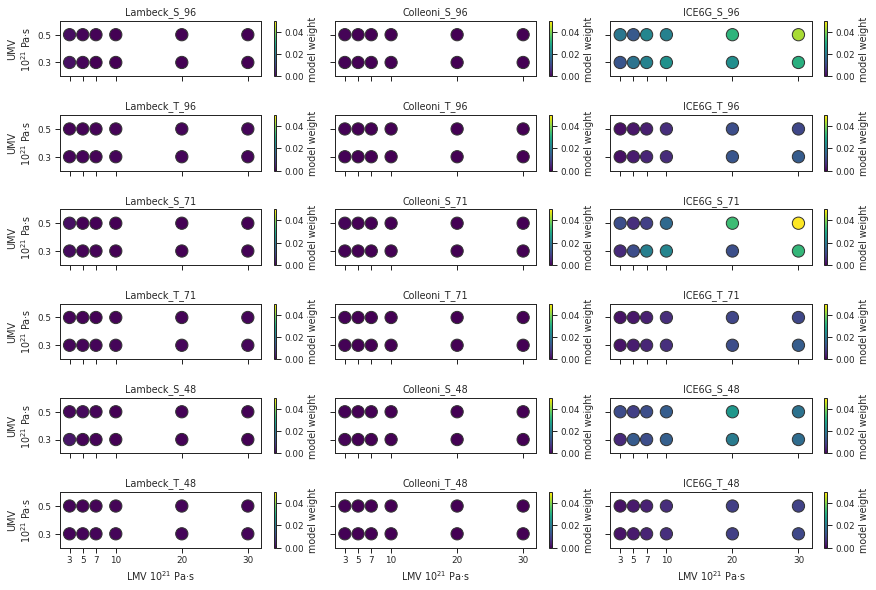

In [267]:
sns.set_context('paper')
fig=plt.figure(figsize=(12,8))
for i in range(0,18):
    experiment = experiments[i]
    plt.subplot(6,3,1+i)
    filtered = comp3[
        (comp3.ice_history == experiment[0])
        & (comp3.deglacial_rate == experiment[1])
        & (comp3.lithosphere == experiment[2])
    ]

        
    plt.scatter(
        filtered['LMV'].values,
        filtered['UMV'] / 1e21,
        c=filtered['weight'],
        s=150,
        cmap="viridis",
        edgecolor=(0.2, 0.2, 0.2),
        lw=1,
        vmin=0,
        vmax=.05,zorder=2
    )
    plt.colorbar(label='model weight')

    plt.gca().set_xticklabels((np.round(np.unique(lower), 0) / 1e21).astype(int))
    plt.gca().set_yticks(np.unique(upper) / 1e21)
    plt.gca().set_xticks(np.unique(lower))
    plt.gca().set_xlim(1.5e21, 32e21)
    plt.gca().set_ylim(0.2, 0.6)
    if i>14:
        plt.gca().set_xlabel("LMV $10^{21}$ Pa·s")
    else:
        plt.gca().set_xticklabels([])
    if i%3==0:
        plt.gca().set_ylabel("UMV\n$10^{21}$ Pa·s")
    else:
        plt.gca().set_yticklabels([])


    plt.minorticks_off()
    plt.gca().set_title(experiment[0]+'_'+experiment[1]+'_'+str(experiment[2]))


fig.tight_layout()
fig.tight_layout(pad=0, w_pad=1, h_pad=2)

In [525]:
ESL_CURVE[(Age_ESL>=115) & (Age_ESL<=130)]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

[115.  115.5 116.  116.5 117.  117.5 118.  118.5 119.  119.5 120.  120.5
 121.  121.5 122.  122.5 123.  123.5 124.  124.5 125.  125.5 126.  126.5
 127.  127.5 128.  128.5 129.  129.5 130. ]


(115, 130)

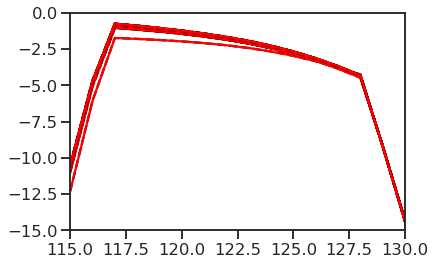

In [358]:
def interpolation_functions(LAT, LON, GIA_MODEL, ESL, ESL_AGE):
    island_Zs = [
        [lookup_z(lat, lon, m, model_dims) for lat, lon in zip(LAT, LON)]
        for m in GIA_MODEL
    ]

    island_Zs = np.array(island_Zs)
    
    ESL[(ESL_AGE>=115) & (ESL_AGE<=130)]=0 #remove GIA splice
    print(ESL_AGE[(ESL_AGE>=115) & (ESL_AGE<=130)])
    Zfuns = []
    for k in range(island_Zs.shape[1]):
        RSL=np.copy(ESL)
        gia_function=interp1d(np.arange(115, 131), island_Zs[:, k]) #age resolution different than gia models
#         plt.plot(np.arange(115, 131),island_Zs[:, k])
        plt.plot(ESL_AGE[(ESL_AGE>=115) & (ESL_AGE<=130)],gia_function(ESL_AGE[(ESL_AGE>=115) & (ESL_AGE<=130)]),'--k')
        RSL[(ESL_AGE>=115) & (ESL_AGE<=130)]=gia_function(ESL_AGE[(ESL_AGE>=115) & (ESL_AGE<=130)]) #splice in GIA
        
        Zfuns.append(
            UnivariateSpline(ESL_AGE, RSL, k=1, ext=3,s=0)
        )  ## 3 returns boundary value at extrapolation
        plt.plot(ESL_AGE,Zfuns[-1](ESL_AGE),'r')

    return Zfuns

k=len(model_names)-1
GIA_MODEL = models[k]
if '_S' in model_names[k]:
    ESL_CURVE = Wael
if '_T' in model_names[k]:
    ESL_CURVE = Wael_T

z_functions = interpolation_functions(data["lat"], data["lon"], GIA_MODEL,ESL_CURVE,Age_ESL)

#plt.plot(trace['age'],trace['GIA'],'.',alpha=.01,color='b')
xt=np.linspace(80,180,1000)
# for i in range(len(z_functions)):
#     plt.plot(xt,z_functions[i](xt),'k')
#     x=np.arange(115,131)
#     y=[lookup_z(data['lat'][i],data['lon'][i],m,model_dims) for m in models[-1]]
#     plt.plot(x,y,'o')

plt.gca().set_ylim(-15,0)
plt.gca().set_xlim(115,130)

In [548]:
UnivariateSpline??

In [553]:
import theano.tensor as tt
from theano import shared
from pymc3.distributions.dist_math import SplineWrapper


def interpolation_functions(LAT, LON, GIA_MODEL, ESL, ESL_AGE):
    island_Zs = [
        [lookup_z(lat, lon, m, model_dims) for lat, lon in zip(LAT, LON)]
        for m in GIA_MODEL
    ]

    island_Zs = np.array(island_Zs)
    
    ESL[(ESL_AGE>=115) & (ESL_AGE<=130)]=0 #remove GIA splice

    Zfuns = []
    for k in range(island_Zs.shape[1]):
        RSL=np.copy(ESL)
        gia_function=interp1d(np.arange(115, 131), island_Zs[:, k]) #age resolution different than gia models
        RSL[(ESL_AGE>=115) & (ESL_AGE<=130)]=gia_function(ESL_AGE[(ESL_AGE>=115) & (ESL_AGE<=130)]) #splice in GIA
        
        Zfuns.append(
            UnivariateSpline(ESL_AGE, RSL, k=1, ext=3, s=0)
        )  ## 3 returns boundary value at extrapolation

    return Zfuns

z_functions = interpolation_functions(data["lat"], data["lon"], GIA_MODEL,Wael,Age_ESL)

In [583]:
N = data["lat"].size
comparison = {}

for k in range(1):
    clear_output(wait=True)
    print("running simulation number " + str(k + 1) + " of " + str(len(models)))
    GIA_MODEL = models[k]
    if '_S' in model_names[k]:
        ESL_CURVE = Wael
    if '_T' in model_names[k]:
        ESL_CURVE = Wael_T
        
    z_functions = interpolation_functions(data["lat"], data["lon"], GIA_MODEL,ESL_CURVE,Age_ESL)

    with pm.Model() as model:
        sd = pm.Normal("sd", 0, 1, shape=(data["lat"].size))
        age = pm.Deterministic(
            "age", shared(data["age"]) + sd * shared(data["age_uncertainty"])
        )
        
        mean_gmsl = pm.Normal('MSL',0,10)
        
        yls = pm.Normal("sigma", sd=15)  # signal variance
        cov = yls ** 2 * pm.gp.cov.WhiteNoise(1)
        gp = pm.gp.Latent(cov_func=cov)
        gmsl_inference = gp.prior(
            "gmsl", X=age[:, np.newaxis], shape=((N),)
        )  # prior needs to be (n1+n2,)
        GIA = tt.zeros(data["lat"].size, dtype="float64")
        for i in range(data["lat"].size):
            GIA = tt.set_subtensor(GIA[i], SplineWrapper(z_functions[i])(age[i]))
        gia_collect=pm.Deterministic('GIA',GIA)
        observations = pm.Deterministic(
            "RSL_estimate", gmsl_inference.flatten() + mean_gmsl + GIA.flatten()
        )
#         sigma = pm.HalfNormal("sigma", sd=15)  # 'geologic noise'
        likelihood = pm.Normal(
            "zero",
            mu=observations,
            sd=data["elevation_uncertainty"],
            observed=data["elevation"],
        )
        trace = pm.sample(init='advi',n_init=100000,progressbar=True)
        az_trace = az.convert_to_inference_data(trace)
        comparison[model_names[k]] = az_trace

running simulation number 1 of 216


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 390.75:  33%|███▎      | 32999/100000 [00:23<00:48, 1392.68it/s] 
Convergence achieved at 33000
Interrupted at 32,999 [32%]: Average Loss = 4,373
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gmsl_rotated_, sigma, MSL, sd]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [05:15<00:00, 12.67draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [556]:
comp = pm.compare(comparison, ic="waic", method="stacking")

In [557]:
comp

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
output48Cp310_Colleoni_Wael_T,0,-57.036,7.63991,0,0.961641,4.27387,0,True,log
output48Cp310_Lambeck_Wael_S,1,-69.2914,17.4835,12.2553,0,6.05144,6.28259,True,log
output48Cp310_ICE6G_Wael_S,2,-72.8319,18.9004,15.7958,0,6.28314,4.33783,True,log
output48Cp310_ICE6G_Wael_T,3,-75.8895,18.2448,18.8535,0.00852428,6.05,7.03645,True,log
output48Cp310_Colleoni_Wael_S,4,-79.7329,17.8733,22.6969,0.029835,7.91895,9.15446,True,log


In [558]:
compare_model_names=comp.index.values
model_params_df = {}
for i in range(len(compare_model_names)):
    md_id = np.where(model_names==compare_model_names[i])[0][0]
    ice_history = compare_model_names[i].split('_')[1]
    esl_curve = compare_model_names[i].split('_')[2]
    deglacial_rate = compare_model_names[i].split('_')[3]
    model_params_df[compare_model_names[i]]=[lower[md_id],upper[md_id],litho[md_id],ice_history,esl_curve,deglacial_rate]
    
df2=pd.DataFrame.from_dict(
    model_params_df,orient='index',
    columns=["LMV", "UMV", "lithosphere", "ice_history", "esl_curve", "deglacial_rate"],
)

comp3=comp.join(df2)

In [559]:
# one subplot for each experiment
experiments = [
    ["Lambeck", "S", 96],
    ["Colleoni", "S", 96],
    ["ICE6G", "S", 96],
    ["Lambeck", "T", 96],
    ["Colleoni", "T", 96],
    ["ICE6G", "T", 96],
    ["Lambeck", "S", 71],
    ["Colleoni", "S", 71],
    ["ICE6G", "S", 71],
    ["Lambeck", "T", 71],
    ["Colleoni", "T", 71],
    ["ICE6G", "T", 71],
    ["Lambeck", "S", 48],
    ["Colleoni", "S", 48],
    ["ICE6G", "S", 48],
    ["Lambeck", "T", 48],
    ["Colleoni", "T", 48],
    ["ICE6G", "T", 48],
]

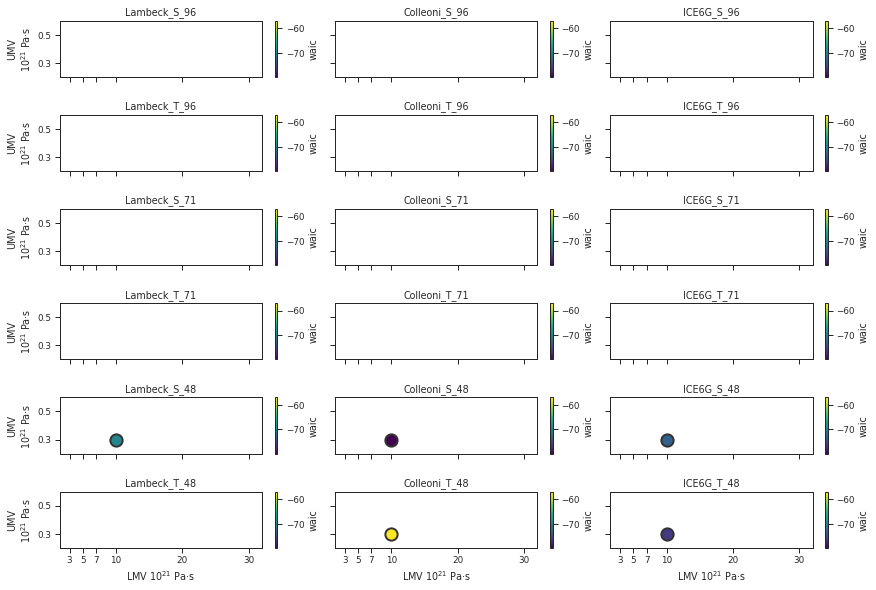

In [560]:
ic='waic'
sns.set_context('paper')
fig=plt.figure(figsize=(12,8))
for i in range(0,18):
    experiment = experiments[i]
    plt.subplot(6,3,1+i)
    filtered = comp3[
        (comp3.ice_history == experiment[0])
        & (comp3.deglacial_rate == experiment[1])
        & (comp3.lithosphere == experiment[2])
    ]

        
    plt.scatter(
        filtered['LMV'].values,
        filtered['UMV'] / 1e21,
        c=filtered[ic],
        s=150,
        cmap="viridis",
        edgecolor=(0.2, 0.2, 0.2),
        lw=2,
        vmin=comp3[ic].values.min(),
        vmax=comp3[ic].values.max(),zorder=2
    )
    plt.colorbar(label=ic)

    plt.gca().set_xticklabels((np.round(np.unique(lower), 0) / 1e21).astype(int))
    plt.gca().set_yticks(np.unique(upper) / 1e21)
    plt.gca().set_xticks(np.unique(lower))
    plt.gca().set_xlim(1.5e21, 32e21)
    plt.gca().set_ylim(0.2, 0.6)
    if i>14:
        plt.gca().set_xlabel("LMV $10^{21}$ Pa·s")
    else:
        plt.gca().set_xticklabels([])
    if i%3==0:
        plt.gca().set_ylabel("UMV\n$10^{21}$ Pa·s")
    else:
        plt.gca().set_yticklabels([])


    plt.minorticks_off()
    plt.gca().set_title(experiment[0]+'_'+experiment[1]+'_'+str(experiment[2]))


fig.tight_layout()
fig.tight_layout(pad=0, w_pad=1, h_pad=2)

In [561]:
compare_model_names=comp.index.values
model_params_df = {}
for i in range(len(compare_model_names)):
    mean_gmsl = np.mean(comparison[compare_model_names[i]].posterior['MSL'].values.ravel())
    model_params_df[compare_model_names[i]]=[mean_gmsl]
    
df3=pd.DataFrame.from_dict(
    model_params_df,orient='index',
    columns=["mean_gmsl"],
)
comp4=comp3.join(df3)


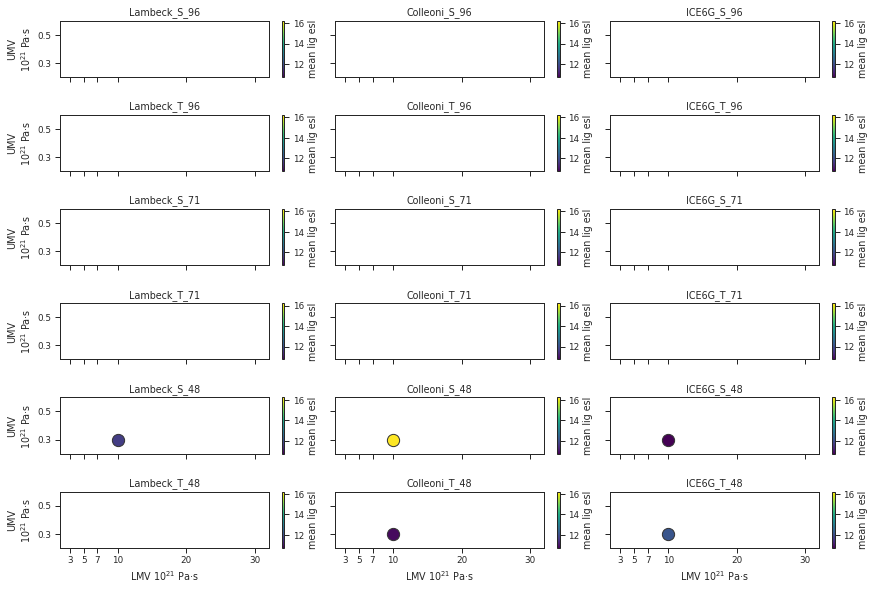

In [562]:
sns.set_context('paper')
fig=plt.figure(figsize=(12,8))
for i in range(0,18):
    experiment = experiments[i]
    plt.subplot(6,3,1+i)
    filtered = comp4[
        (comp4.ice_history == experiment[0])
        & (comp4.deglacial_rate == experiment[1])
        & (comp4.lithosphere == experiment[2])
    ]

        
    plt.scatter(
        filtered['LMV'].values,
        filtered['UMV'] / 1e21,
        c=filtered['mean_gmsl'],
        s=150,
        cmap="viridis",
        edgecolor=(0.2, 0.2, 0.2),
        lw=1,
        vmin=comp4['mean_gmsl'].values.min(),
        vmax=comp4['mean_gmsl'].values.max(),
        zorder=2
    )
    plt.colorbar(label='mean lig esl')

    plt.gca().set_xticklabels((np.round(np.unique(lower), 0) / 1e21).astype(int))
    plt.gca().set_yticks(np.unique(upper) / 1e21)
    plt.gca().set_xticks(np.unique(lower))
    plt.gca().set_xlim(1.5e21, 32e21)
    plt.gca().set_ylim(0.2, 0.6)
    if i>14:
        plt.gca().set_xlabel("LMV $10^{21}$ Pa·s")
    else:
        plt.gca().set_xticklabels([])
    if i%3==0:
        plt.gca().set_ylabel("UMV\n$10^{21}$ Pa·s")
    else:
        plt.gca().set_yticklabels([])


    plt.minorticks_off()
    plt.gca().set_title(experiment[0]+'_'+experiment[1]+'_'+str(experiment[2]))


fig.tight_layout()
fig.tight_layout(pad=0, w_pad=1, h_pad=2)

In [602]:
data['elevation']

array([-2.7305, -2.1743, -2.7822, -2.2461, -2.9194, -3.4312, -2.7109,
       -2.6348, -2.5601, -2.7109])

## Elevation observation  = GMSL + GIA 

(115, 130)

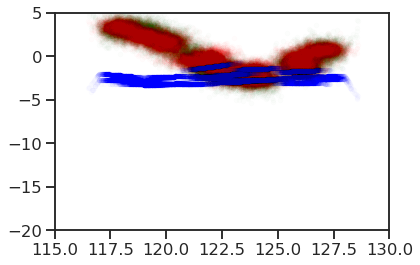

In [425]:
# plt.plot(trace['age'],trace['RSL_estimate'],'.',alpha=.05,color='k')
# plt.errorbar(data['age'],data['elevation'],xerr=2*data['age_uncertainty'],yerr=2*data['elevation_uncertainty'],linestyle='none')
plt.plot(trace['age'],trace['gmsl'],'.',alpha=.01,color='g')
plt.plot(trace['age'],trace['RSL_estimate'],'.',alpha=.01,color='r')
plt.plot(trace['age'],trace['GIA'],'.',alpha=.01,color='b')
plt.gca().set_ylim(-20,5)
plt.gca().set_xlim(115,130)

(-5, 10)

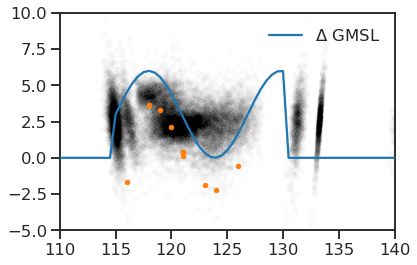

In [333]:
sns.set_context('talk')
LIG = (Age_ESL>=115) & (Age_ESL<=130) 

k=true_choice
GIA_MODEL = models[k]
if '_S' in model_names[k]:
    ESL_CURVE = Wael
if '_T' in model_names[k]:
    ESL_CURVE = Wael_T
    
synth_gmsl = np.copy(ESL_CURVE)
synth_gmsl[LIG]=ESL_CURVE[LIG]+3*np.sin(xt/(.6*np.pi))+3
plt.plot(Age_ESL,synth_gmsl-Wael_T,label='$\Delta$ GMSL',zorder=3)
# plt.plot(Age_ESL,Wael_T,label='Wael ESL')
plt.gca().set_xlim([110,140])

plt.legend(loc='best',frameon=False)

plt.plot(trace['age'],trace['RSL_estimate']-trace['GIA'],'.',alpha=.01,color='k')
# plt.plot(trace['age'],trace['GIA'],'.',alpha=.01,color='r')
plt.plot(data['age'],data['elevation'],'.')
plt.gca().set_ylim(-5,10)

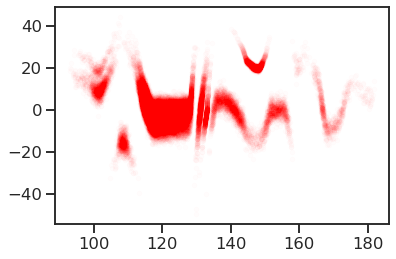

In [652]:
ids=trace['diverging'].nonzero()[0]
plt.plot(trace['age'],trace['gmsl'],'.',alpha=.01,color='r')
plt.plot(trace['age'][ids],trace['gmsl'][ids],'.',alpha=1,color='k')

In [137]:
list(trace)

[{'sd': array([-0.41330187,  0.11739751,  0.35522051, -0.40512807,  0.24451823,
         -0.48300979, -1.05237852,  0.09863042,  0.29916597, -0.26987291,
          1.09276317, -0.60143334,  0.56111248,  0.00558192, -0.05766103,
         -1.65069276,  0.49272927]),
  'sigma_log__': 2.1066721215145385,
  'm_gmsl': 5.3836529537668385,
  'gmsl_rotated_': array([-0.10355769, -2.05087821, -0.75716201, -0.27490009,  0.00856506,
         -0.49556989,  2.24212167,  0.79163271, -0.22151249,  1.43077262,
          0.0440073 , -0.01045904, -1.38206002, -0.51128211, -0.28723444,
          2.116675  , -0.03609621]),
  'age': array([115.62707569, 116.29137265, 122.26264608, 115.73333506,
         128.6897005 , 119.16990211,  97.84767249, 134.28219552,
         125.18832362, 113.57114379, 127.64934221, 114.7899666 ,
         118.3666749 , 115.03349153, 140.30806766, 107.89030129,
         128.91275125]),
  'sigma': 8.220837762998332,
  'gmsl': array([ -0.85133096, -16.85993714,  -6.22450612,  -2.25990

In [385]:
z_functions = interpolation_functions(data["lat"], data["lon"], GIA_MODEL,Wael,Age_ESL)

ValueError: NumPy boolean array indexing assignment cannot assign 16 input values to the 31 output values where the mask is true

In [331]:
GIA_MODEL = models[0]
z_functions = interpolation_functions(data["lat"], data["lon"], GIA_MODEL)

with pm.Model() as model:
    sd = pm.Normal("sd", 0, 1, shape=(data["lat"].size))
    age = pm.Deterministic(
        "age", shared(data["age"]) + sd * shared(data["age_uncertainty"])
    )

    mean_gmsl = pm.Normal('MSL',0,5)

    yls = pm.Gamma("constY", alpha=1, beta=1)  # signal variance
    cov = yls ** 2 * pm.gp.cov.WhiteNoise(1)
    gp = pm.gp.Latent(cov_func=cov)
    gmsl_inference = gp.prior(
        "gmsl", X=age[:, np.newaxis], shape=((N),)
    )  # prior needs to be (n1+n2,)
    GIA = tt.zeros(data["lat"].size, dtype="float64")
    for i in range(data["lat"].size):
        GIA = tt.set_subtensor(GIA[i], SplineWrapper(z_functions[i])(age[i]))
    gia_collect=pm.Deterministic('GIA',GIA)
    observations = pm.Deterministic(
        "RSL_estimate", gmsl_inference.flatten() + mean_gmsl + GIA.flatten()
    )
    sigma = pm.HalfNormal("sigma", sd=15)  # mean of GMSL over interval
    likelihood = pm.Normal(
        "zero",
        mu=observations,
        sd=data["elevation_uncertainty"] + sigma,
        observed=data["elevation"],
    )
    trace = pm.sample(progressbar=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, gmsl_rotated_, constY, MSL, sd]
Sampling 4 chains, 9 divergences: 100%|██████████| 4000/4000 [01:35<00:00, 41.75draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


(50, 160)

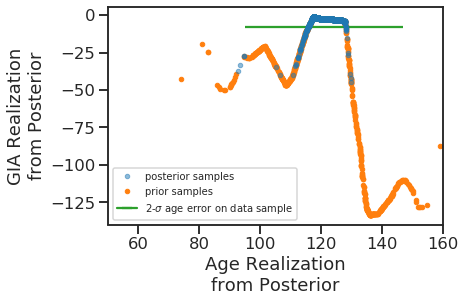

In [398]:
sns.set_context('talk')

prior_age=[age.tag.test_value[0]+np.random.normal(0,1)*data["age_uncertainty"][0] for i in range(1000)]
prior_gia=z_functions[0](prior_age)

k=0
plt.plot(trace['age'][:,k],trace['GIA'][:,k],'.',label='posterior samples',zorder=2,alpha=.5)
plt.plot(prior_age,prior_gia,'.',label='prior samples',zorder=1)
plt.gca().set_xlabel('Age Realization\nfrom Posterior')
plt.gca().set_ylabel('GIA Realization\nfrom Posterior')
plt.errorbar(121,-8,xerr=26,label='2-$\sigma$ age error on data sample')
plt.legend(loc='lower left',frameon=True,fontsize=10)
plt.gca().set_xlim(50,160)

In [336]:
data['age_uncertainty']

array([13., 11., 12., 13., 11., 10., 22., 13., 14.,  9.,  7.,  7.,  6.,
        6., 12., 14., 12.])

In [337]:
data['age']

array([121., 115., 118., 121., 126., 124., 121., 133., 121., 116., 120.,
       119., 115., 115., 141., 131., 123.])

In [370]:
ESL_mat = loadmat(data_dir / "processed/ESL.mat")
Wael = ESL_mat["Wael_S"].ravel()
Wael_T = ESL_mat["Wael_T"].ravel()
Age_ESL = ESL_mat["age_com"].ravel()

(100, 150)

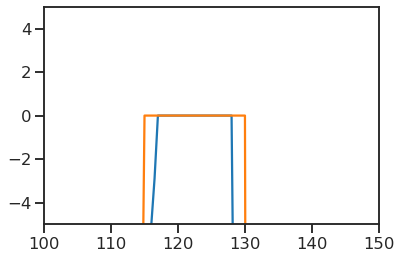

In [379]:
Wael_mod=np.copy(Wael)
Wael_mod[(Age_ESL>=115) & (Age_ESL<=130)]=0
Wael_T_mod=np.copy(Wael_T)
Wael_T_mod[(Age_ESL>=115) & (Age_ESL<=130)]=0

plt.plot(Age_ESL,Wael)
plt.plot(Age_ESL,Wael_mod)
plt.gca().set_ylim(-5,5)
plt.gca().set_xlim(100,150)

In [232]:
A=np.zeros(data['lat'].size,dtype='float64')
A[0]=SplineWrapper(z_functions[i])(124).tag.test_value
A

array([-5.75593234,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [235]:
a[0].tag.test_value

array(121.)

In [176]:
z_functions = interpolation_functions(data['lat'],data['lon'])


In [179]:
pm.SplineWrapper??

Object `pm.SplineWrapper` not found.


(-10, 0)

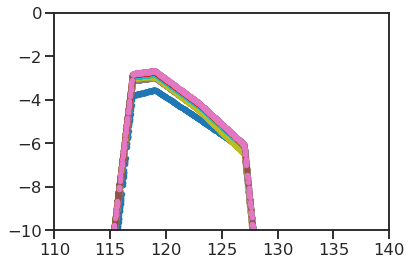

In [248]:
plt.plot(trace['age'],trace['gia'],'.')
# plt.plot(np.arange(115,131),[lookup_z(data['lat'][0],data['lon'][0],m,model_dims) for m in GIA_MODEL],)
plt.gca().set_xlim(110,140)
plt.gca().set_ylim(-10,0)

In [243]:
UnivariateSpline??

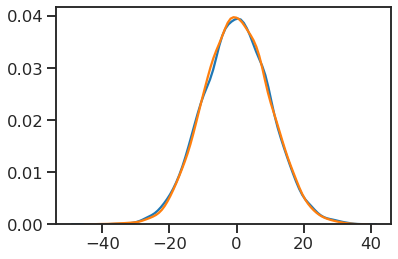

In [150]:
A=np.random.normal(0,1,10000)*10
B=np.random.normal(0,10,10000)
sns.kdeplot(A)
sns.kdeplot(B)

In [154]:
np.random.normal??

# workspace

In [100]:
model = models[0]
island_Zs = [
    [
        lookup_z(lat, lon, m, model_dims)
        for lat, lon in zip(data["lat"].astype(float), data["lon"].astype(float))
    ]
    for m in model
]

island_Zs = np.array(island_Zs)
island_Z_val = []
for k in range(island_Zs.shape[1]):
    Zfuns = interp1d(np.arange(115,131), island_Zs[:, k],fill_value='extrapolate')
    island_Z_val.append(Zfuns(data['age'][k]))

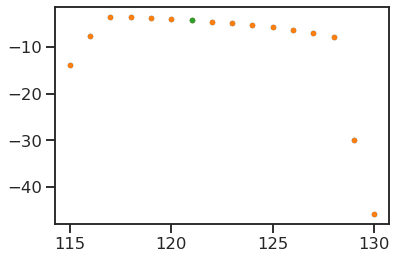

In [105]:
plt.plot(np.arange(115,131),[lookup_z(data['lat'][0],data['lon'][0],m,model_dims) for m in model],'.')
plt.plot(np.arange(115,131),island_Zs[:,0],'.')
plt.plot(data['age'][0],island_Z_val[0],'.')

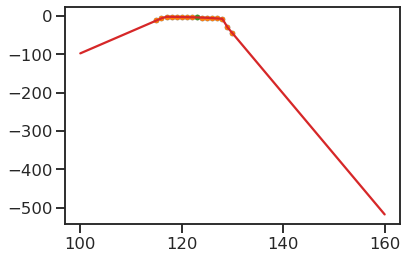

In [109]:
plt.plot(np.arange(115,131),[lookup_z(data['lat'][-1],data['lon'][-1],m,model_dims) for m in model],'.')
plt.plot(np.arange(115,131),island_Zs[:,-1],'.')
plt.plot(data['age'][-1],island_Z_val[-1],'.')
xt=np.linspace(100,160,1000)
plt.plot(xt,Zfuns(xt))

In [ ]:
def lookup_z(lat, lon, model, model_dims):
    """
    Returns the RSL prediction at a specific lat, lon, on a specific GIA model timeslice.
    Parameters
    ----------
    lat: Latitude value
    lon: Longitude value
    model: A 2d matrix from a GIA model output representing a single timeslice.
    model_dims: The real word lat/lon dimensions of the model. [left, right, top, bottom]
    Returns
    -------
    The model RSL prediction nearest the lat, lon pair.
    """
    lat_len = model.shape[0]
    lon_len = model.shape[1]
    lon_list = np.linspace(model_dims[0], model_dims[1], lon_len)
    lat_list = np.linspace(model_dims[3], model_dims[2], lat_len)
    lon_id = np.argmin(
        np.abs(np.linspace(model_dims[0], model_dims[1], lon_len) - (lon))
    )
    lat_id = np.argmin(
        np.abs(np.linspace(model_dims[3], model_dims[2], lat_len) - (lat))
    )
    return model[lat_id, lon_id]

array([54.88, 49.49, 49.7 , 49.67, 49.66, 50.83, 50.78, 50.73, 49.25,
       50.46, 50.11, 50.11, 50.2 , 50.2 , 50.23, 50.23, 50.23])

In [25]:
list(df)

['#',
 'Unique ID\n(no. samples)',
 'Country',
 'Region',
 'Location',
 'Reference(s)',
 'Longitude',
 'Latitude',
 'Deposit / Feature\n(see Comments)',
 'Elevation\n(base)',
 'Elevation\n(top)',
 'Elevation \nError (±m)',
 'Datum',
 'Technique',
 'Age\n(ka BP)',
 'Age Error\n(1σ ka)',
 'Modern Limit\n(upper)',
 'Modern Limit\n(lower)',
 'Upper \nLevel (m)',
 'Lower \nLevel (m)',
 'MHHW',
 'MLLW',
 'Indicative \nRange',
 'Reference Water \nLevel (m)',
 'Relative Sea \nLevel (m)',
 'RSL Error \n(1σ m)',
 'Unnamed: 26']

In [264]:
comp3['lithosphere'].unique()

array([96, 71])

In [265]:
comp3['ice_history'].unique()

array(['Lambeck', 'Colleoni', 'ICE6G'], dtype=object)

In [253]:
comp3['deglacial_rate'].unique()

array(['S', 'T'], dtype=object)

'output71Cp330_ICE6G_Wael_S'

In [202]:
import logging
logger = logging.getLogger('pymc3')
logger.setLevel(logging.ERROR)

# Old scribbles.. can scrap on clean up

In [56]:
import pandas as pd
lats = pd.read_csv(model_dir / "lats", delimiter=",", header=None)
lons = pd.read_csv(model_dir / "lons", delimiter=",", header=None)

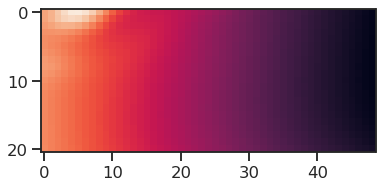

In [90]:
plt.imshow(models[0][3].values[192:213,235:284])

In [ ]:
models[0][3].values()

In [68]:
model_dims

[-14.765999999999998, 19.688, 45.263000000000005, 60.0]

In [69]:
from scipy.interpolate import interp1d

In [105]:
lon_to_id = interp1d([-180,180],[0,models[0][0].shape[1]])
lat_to_id = interp1d([-90,90],[0,models[0][0].shape[0]])
lon_to_id(model_dims[:2]).astype(int)


array([234, 284])

In [104]:
lat_to_id(model_dims[2:]).astype(int)

array([192, 213])

In [107]:
    id_lon=lon_to_id(model_dims[:2]).astype(int)
    id_lat=lat_to_id(model_dims[2:]).astype(int)

In [111]:
for m in range(len(models)):
    for k in range(len(models[m])):
        models[m][k] = models[m][k].values[slice(id_lat[0],id_lat[1],1),slice(id_lon[0],id_lon[1],1)]


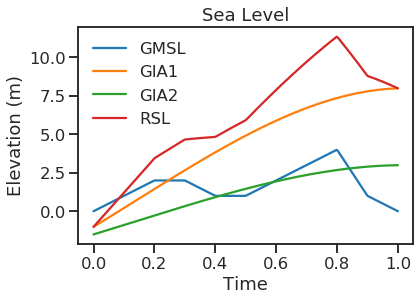

In [604]:
RESOLUTION = 200
TIME = np.linspace(0,1,RESOLUTION)
GMSL = [0,1,2,2,1,1,2,3,4,1,0]
GMSL = interp1d(np.linspace(0,1,len(GMSL)),GMSL)(TIME)
GIA1 = np.array([1,4,7,9,10])-2
GIA_fun1 = UnivariateSpline(np.linspace(0,1,len(GIA1)),GIA1,ext=1)
GIA2 = .5*np.array([1,4,7,9,10])-2
GIA_fun2 = UnivariateSpline(np.linspace(0,1,len(GIA2)),GIA2,ext=1)
RSL_fun = interp1d(np.linspace(0,1,len(GIA)),GIA_fun1(TIME)+GMSL)

plt.plot(TIME,GMSL,'-', label='GMSL')
plt.plot(TIME,GIA_fun1(TIME),'-', label='GIA1')
plt.plot(TIME,GIA_fun2(TIME),'-', label='GIA2')
plt.plot(TIME,RSL_fun(TIME),'-', label='RSL')

plt.legend(loc='best',frameon=False)
plt.gca().set_xlabel('Time')
plt.gca().set_ylabel('Elevation (m)')
_=plt.gca().set_title('Sea Level')

In [613]:
RSL_fun(np.array([.1,.15,.3,.5,.5,.8,.81,.84,.9,.9]))-interp1d(np.linspace(0,1,len(GMSL)),GMSL)(np.array([.1,.15,.3,.5,.5,.8,.81,.84,.9,.9]))

array([0.20800161, 0.82628541, 2.66170101, 4.91424964, 4.91424964,
       7.35595745, 7.40954931, 7.55738837, 7.79197242, 7.79197242])

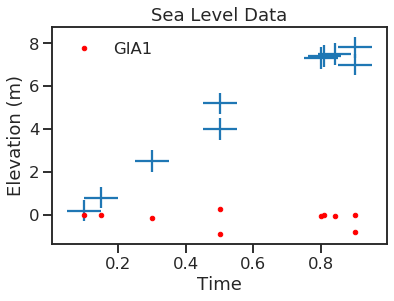

In [1039]:

data = {}
data["age"] = np.array([.1,.15,.3,.5,.5,.8,.81,.84,.9,.9])
data["age_uncertainty"] = np.array([0.05] * data["age"].size)
data["elevation"] = np.array([.2,.8,2.5,4,5.2,7.3,7.4,7.5,7.8,7.0])
data["elevation_uncertainty"] = np.array([0.5] * data["elevation"].size)

N=data['age'].size

plt.errorbar(
    data["age"],
    data["elevation"],
    xerr=data["age_uncertainty"],
    yerr=data["elevation_uncertainty"],
    linestyle="none",
)

GIA1 = GIA_fun1(data["age"])
GIA2 = np.array([0.208     , 0.82628571, 2.66171429, 3.91428571, 5.91428571,
       7.356     , 7.40959086, 7.55742629, 8.5    , 7.092     ])-.1

plt.plot(data["age"],data["elevation"]-GIA1,'r.',label='GIA1')
# plt.plot(data["age"],data["elevation"]-GIA2,'k.',zorder=3,label='GIA2')

plt.legend(loc='best',frameon=False)



plt.gca().set_xlabel('Time')
plt.gca().set_ylabel('Elevation (m)')
_=plt.gca().set_title('Sea Level Data')

In [1046]:
comparison = {}
for i in range(10):
    with pm.Model() as model:
        GIA = GIA1 + np.random.normal(0,.05,GIA1.size)

        sample_age = pm.Normal(
            "sample_age",
            mu=data["age"],
            sd=data["age_uncertainty"],
            shape=(N,)
        )

    #     sample_rsl = pm.Normal(
    #         "sample_rsl",
    #         mu=data["elevation"],
    #         sd=data["elevation_uncertainty"],
    #         shape=(N,)
    #     )

        #ls = pm.Gamma('ls',alpha=1,beta=1,shape=(2,1))  #lengthscale of cov for white noise and matern
        yls = pm.Gamma('constY',alpha=1,beta=1) #signal variance
    #   meany = pm.Normal('meanY',mu=0,sd=15) #mean of GMSL over interval

        cov = yls**2 * pm.gp.cov.WhiteNoise(1)

        gp = pm.gp.Latent(cov_func=cov)

        gmsl_inference = gp.prior(
            "gmsl", X=sample_age[:,np.newaxis], shape=((N),)
        )  # prior needs to be (n1+n2,)

        RSL_estimate = pm.Deterministic(
            "RSL_estimate", gmsl_inference.flatten() + GIA.flatten()
        )

        sigma = pm.HalfNormal('sigma',sd=15) #mean of GMSL over interval
        likelihood = pm.Normal(
            "zero",
            mu=RSL_estimate,
            sd=data["elevation_uncertainty"]+sigma,
            observed=data["elevation"]
        )

        #trace2 = pm.sample(draws=1000, tune=500, init='nuts', n_init=1000, progressbar=True)
        trace = pm.sample(progressbar=True)

        az_trace=az.convert_to_inference_data(trace)
        comparison[str(i)]=az_trace

i+=1       
with pm.Model() as model:
    GIA = data["elevation"] - 0 + np.random.normal(0,.05,GIA1.size)

    sample_age = pm.Normal(
        "sample_age",
        mu=data["age"],
        sd=data["age_uncertainty"],
        shape=(N,)
    )

#     sample_rsl = pm.Normal(
#         "sample_rsl",
#         mu=data["elevation"],
#         sd=data["elevation_uncertainty"],
#         shape=(N,)
#     )

    #ls = pm.Gamma('ls',alpha=1,beta=1,shape=(2,1))  #lengthscale of cov for white noise and matern
    yls = pm.Gamma('constY',alpha=1,beta=1) #signal variance
#   meany = pm.Normal('meanY',mu=0,sd=15) #mean of GMSL over interval

    cov = yls**2 * pm.gp.cov.WhiteNoise(1)

    gp = pm.gp.Latent(cov_func=cov)

    gmsl_inference = gp.prior(
        "gmsl", X=sample_age[:,np.newaxis], shape=((N),)
    )  # prior needs to be (n1+n2,)

    RSL_estimate = pm.Deterministic(
        "RSL_estimate", gmsl_inference.flatten() + GIA.flatten()
    )

    sigma = pm.HalfNormal('sigma',sd=15) #mean of GMSL over interval
    likelihood = pm.Normal(
        "zero",
        mu=RSL_estimate,
        sd=data["elevation_uncertainty"]+sigma,
        observed=data["elevation"]
    )

    #trace2 = pm.sample(draws=1000, tune=500, init='nuts', n_init=1000, progressbar=True)
    trace = pm.sample(progressbar=True)

    az_trace=az.convert_to_inference_data(trace)
    comparison[str(i)]=az_trace

#         gmsl_pred1 = gp.conditional("gmsl_pred",  TIME[:,None])
#         pred_samples1 = pm.sample_posterior_predictive(trace2, vars=[gmsl_pred1], samples=2000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, gmsl_rotated_, constY, sample_age]
Sampling 4 chains, 1 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1129.34draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, gmsl_rotated_, constY, sample_age]
Sampling 4 chains, 1 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1117.20draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, gmsl_rotated_, constY, sample_age]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1185.21draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter

In [1048]:
comp = pm.compare(comparison, ic="waic", method="pseudo-BMA",
)
comp

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
10,0,-4.12076,0.280458,0,1,0.0166507,0,False,log
0,1,-6.41752,0.672272,2.29677,0,0.916007,0.920771,False,log
8,2,-6.80827,0.684841,2.68752,0,1.03098,1.03595,False,log
2,3,-6.84533,0.700549,2.72458,0,1.05565,1.06015,False,log
5,4,-6.84763,0.745295,2.72688,0,1.11032,1.11473,False,log
1,5,-6.88954,0.766021,2.76879,0,1.05248,1.05726,False,log
3,6,-6.99182,0.747775,2.87106,0,1.12051,1.12531,False,log
9,7,-7.00288,0.76101,2.88212,0,1.15293,1.15796,False,log
4,8,-7.21252,0.79465,3.09176,0,1.1635,1.16831,False,log
7,9,-7.27138,0.871793,3.15062,0,1.19822,1.20265,False,log


Inference data with groups:
	> posterior
	> sample_stats
	> log_likelihood
	> observed_data

In [1061]:
comp2 = pm.compare(comparison, ic="loo", b_samples=100000,
)
comp2

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
0,0,-6.44285,0.697602,0,0.16707,0.880888,0,False,log
8,1,-6.82241,0.698976,0.379553,0.113248,1.14872,0.122918,False,log
2,2,-6.86231,0.71753,0.419459,0.108763,1.00769,0.140057,False,log
5,3,-6.87375,0.771411,0.430895,0.107507,1.09867,0.195157,True,log
1,4,-6.91657,0.793046,0.473716,0.103132,0.982465,0.146451,True,log
9,5,-7.0147,0.772831,0.571846,0.0951823,1.13724,0.311952,False,log
3,6,-7.01853,0.774485,0.575673,0.0930558,1.06222,0.203915,True,log
4,7,-7.23012,0.812254,0.78727,0.0754489,1.0066,0.245098,False,log
7,8,-7.30328,0.903702,0.860432,0.0704587,1.10986,0.286151,False,log
6,9,-7.36546,0.877416,0.922608,0.0661331,1.0698,0.275109,False,log


In [1057]:
pm.compare??

In [1019]:
with pm.Model() as model2:
    GIA = GIA2
       
    sample_age = pm.Normal(
        "sample_age",
        mu=data["age"],
        sd=data["age_uncertainty"],
        shape=(N,)
    )

    sample_rsl = pm.Normal(
        "sample_rsl",
        mu=data["elevation"],
        sd=data["elevation_uncertainty"],
        shape=(N,)
    )

    #ls = pm.Gamma('ls',alpha=1,beta=1,shape=(2,1))  #lengthscale of cov for white noise and matern
    yls = pm.Gamma('constY',alpha=1,beta=1) #signal variance
#   meany = pm.Normal('meanY',mu=0,sd=15) #mean of GMSL over interval

    cov = yls**2 * pm.gp.cov.WhiteNoise(1)

    gp = pm.gp.Latent(cov_func=cov)
    
    gmsl_inference = gp.prior(
        "gmsl", X=sample_age[:,np.newaxis], shape=((N),)
    )  # prior needs to be (n1+n2,)

    RSL_estimate = pm.Deterministic(
        "RSL_estimate", gmsl_inference.flatten() + GIA.flatten()
    )

    sigma = pm.HalfNormal('sigma',sd=15) #mean of GMSL over interval
    likelihood = pm.Normal(
        "zero",
        mu=RSL_estimate,
        sd=data["elevation_uncertainty"]+sigma,
        observed=data["elevation"]
    )

    #trace2 = pm.sample(draws=1000, tune=500, init='nuts', n_init=1000, progressbar=True)
    trace2 = pm.sample(progressbar=True)
    
    az_trace2=az.convert_to_inference_data(trace2)
    
    gmsl_pred2 = gp.conditional("gmsl_pred",  TIME[:,None])
    pred_samples2 = pm.sample_posterior_predictive(trace2, vars=[gmsl_pred2], samples=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, gmsl_rotated_, constY, sample_rsl, sample_age]
100%|██████████| 2000/2000 [00:07<00:00, 273.93it/s]


In [1024]:
comp = pm.compare(
    {"model1": az_trace1, "model2": az_trace2,}, ic="waic", method="pseudo-BMA",
)
comp

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model2,0,-5.57351,0.47603,0,0.798602,0.618283,0,False,log
model1,1,-6.95109,0.784107,1.37758,0.201398,1.12932,1.37959,False,log


(0, 1)

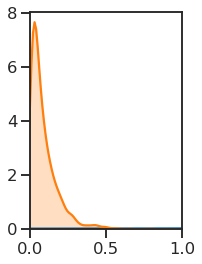

In [1021]:
plt.subplot(1,2,1)
sns.kdeplot([sigma.random() for i in range(1000)])
sns.kdeplot(trace2['sigma'],shade=True)
plt.gca().set_xlim(0,1)



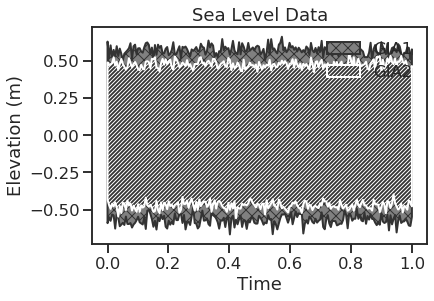

In [1028]:
percent = 5
top = np.percentile(pred_samples1['gmsl_pred'],100-(percent/2),axis=0)
bot = np.percentile(pred_samples1['gmsl_pred'],(percent/2),axis=0)
plt.fill_between(TIME,bot,top,alpha=1,facecolor=(.5,.5,.5,.5),hatch='\/\/',label='GIA1',lw=2,edgecolor=(.2,.2,.2))

top = np.nanpercentile(pred_samples2['gmsl_pred'],100-(percent/2),axis=0)
bot = np.nanpercentile(pred_samples2['gmsl_pred'],(percent/2),axis=0)
plt.fill_between(TIME,bot,top,alpha=1,facecolor=(.2,.2,.2,0),hatch='//////',label='GIA2',lw=2)
plt.legend(loc='best',frameon=False)



#plt.gca().set_ylim([-4,4])
plt.gca().set_xlabel('Time')
plt.gca().set_ylabel('Elevation (m)')
_=plt.gca().set_title('Sea Level Data')

In [741]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (
    RBF,
    ConstantKernel as C,
    Matern,
    WhiteKernel,
)

In [931]:
sample_rsl = gp + gia

-13.115899821444824
4.89**2 * Matern(length_scale=1.17, nu=1.5) + WhiteKernel(noise_level=1e-05) + 0.337**2 * Matern(length_scale=0.00204, nu=1.5) + WhiteKernel(noise_level=1e-05)


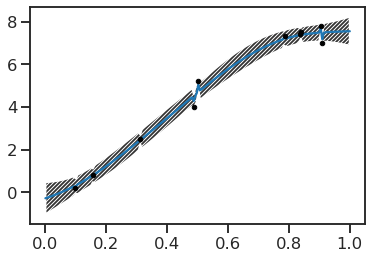

In [983]:

# X_stack = np.vstack([data['age'], data['elevation']]).T

kernel =  C(1) * Matern(
    length_scale=0.1, length_scale_bounds=(0.001, 100), nu=3 / 2
) + WhiteKernel(1) + C(1) * Matern(
    length_scale=0.1, length_scale_bounds=(0.001, 100), nu=3 / 2
) + WhiteKernel(1)  # covariance kernel for GP

X=np.atleast_2d(data['age']+np.random.normal(0,0.01,data['age'].size)).T
y=np.array(data['elevation']).ravel()

gp = GaussianProcessRegressor(
    kernel=kernel,
    normalize_y=True,
    n_restarts_optimizer=150,
    alpha=.05,
)  # alpha is the variance added to the covariance matrix
gp.fit(X,y)  # fit the GP

y_pred, STD = gp.predict(TIME.reshape(-1, 1), return_std=True)
top=(y_pred.ravel()+STD.ravel())
bot=(y_pred.ravel()-STD.ravel())
plt.fill_between(TIME,bot,top,alpha=1,facecolor=(.2,.2,.2,0),hatch='//////',label='GIA2',lw=2)
plt.plot(TIME,y_pred)

plt.plot(X, y,'k.')

# x_test = np.vstack([GRID[0].ravel(), GRID[1].ravel()]).T
print(gp.log_marginal_likelihood_value_)
print(gp.kernel_)

# kernel = C(1) * Matern(
#     length_scale=0.1, length_scale_bounds=(0.001, 100), nu=3 / 2
# ) 

# gp = GaussianProcessRegressor(
#     kernel=kernel,
#     n_restarts_optimizer=150,
#     alpha=.1*data['elevation_uncertainty']**2,
# )  # alpha is the variance added to the covariance matrix
# gp.fit(data['age'].T.reshape(-1, 1), np.array(data['elevation']-GIA2).ravel())  # fit the GP

# y_pred, STD = gp.predict(TIME.reshape(-1, 1), return_std=True)
# top=(y_pred.ravel()+STD.ravel())
# bot=(y_pred.ravel()-STD.ravel())
# plt.fill_between(TIME,bot,top,alpha=1,facecolor=(.2,.2,.2,0),hatch='++',label='GIA2',lw=2)


# # x_test = np.vstack([GRID[0].ravel(), GRID[1].ravel()]).T
# print(gp.log_marginal_likelihood_value_)
# print(gp.kernel_)

2.5773441713685195
29**2 * Matern(length_scale=100, nu=1.5) + 0.00316**2 * WhiteKernel(noise_level=1e-05)


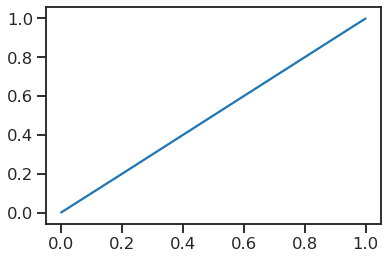

In [815]:

# X_stack = np.vstack([data['age'], data['elevation']]).T

kernel = C(1) * Matern(
    length_scale=0.1, length_scale_bounds=(0.001, 100), nu=3 / 2
) + C(1) * WhiteKernel(1)  # covariance kernel for GP

gp = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=15,
)  # alpha is the variance added to the covariance matrix
gp.fit(np.array([.2,.4,.6,.8]).T.reshape(-1, 1), np.array([.2,.4,.6,.8]).ravel())  # fit the GP

y_pred, STD = gp.predict(TIME.reshape(-1, 1), return_std=True)
top=(y_pred.ravel()+STD.ravel())
bot=(y_pred.ravel()-STD.ravel())
plt.fill_between(TIME,bot,top,alpha=1,facecolor=(.2,.2,.2,0),hatch='//////',label='GIA2',lw=2)
plt.plot(TIME,y_pred.ravel())

# x_test = np.vstack([GRID[0].ravel(), GRID[1].ravel()]).T
print(gp.log_marginal_likelihood_value_)
print(gp.kernel_)

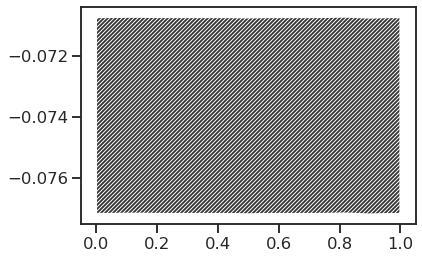

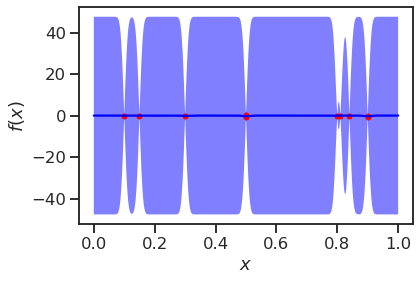

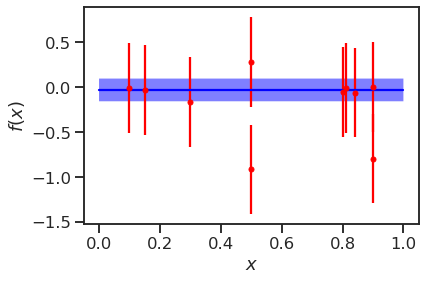

In [960]:
# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X=np.atleast_2d(data['age']).T
y=np.array(data['elevation']-GIA1).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 1, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')



# ----------------------------------------------------------------------
# now the noisy case
X=np.atleast_2d(data['age']).T
y=np.array(data['elevation']-GIA1).ravel()

dy = data['elevation_uncertainty'].ravel()


# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')


plt.show()

In [173]:
import warnings

warnings.filterwarnings("ignore")

with pm.Model() as model:
    scale=10
    ls = pm.Gamma(
        "x_lengthscale", alpha=1, beta=1, shape=(2, 1)
    )  # lengthscale of cov for white noise and matern
    yls = pm.Gamma("y_variance", alpha=1, beta=1)  # signal variance
    meany = pm.Normal("y_mean", mu=0, sd=15)  # mean of GMSL over interval
    cov = yls * pm.gp.cov.Matern32(1, ls=ls[0]/scale) + ls[1]/scale * pm.gp.cov.WhiteNoise(1)
    mean_func = pm.gp.mean.Constant(meany)
    gp = pm.gp.Latent(mean_func=mean_func, cov_func=cov)

    sample_age = pm.Normal(
        "sample_age",
        mu=data["age"][:, np.newaxis],
        sd=data["age_uncertainty"][:, np.newaxis],
        shape=(N, 1),
    )
    sample_rsl = pm.Normal(
        "sample_rsl",
        mu=data["elevation"][:, np.newaxis],
        sd=data["elevation_uncertainty"][:, np.newaxis],
        shape=(N, 1),
    )
    gia_spline = SplineWrapper(GIA_fun)
    gia_model = pm.Deterministic("gia", gia_spline(sample_age))

    gmsl_inference = gp.prior(
        "gmsl", X=sample_age, shape=(N,)
    )  # prior needs to be (n1+n2,)
   
    RSL_estimate = pm.Deterministic("RSL_estimate", gmsl_inference + gia_model)

    likelihood = pm.Normal("zero", mu=RSL_estimate, sd=data["elevation_uncertainty"], observed=data['elevation'])

    trace = pm.sample(
        draws=250,
        tune=250,
        step=pm.NUTS(target_accept=0.99),
        init="advi",
        cores=16,
        progressbar=True,
        chains=16,
    )

    gmsl_pred = gp.conditional("gmsl_pred",  TIME[:,None])
    pred_samples = pm.sample_posterior_predictive(trace, vars=[gmsl_pred], samples=2000)
    
warnings.resetwarnings()

Only 250 samples in chain.
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [gmsl_rotated_, sample_rsl, sample_age, y_mean, y_variance, x_lengthscale]
Sampling 16 chains, 0 divergences: 100%|██████████| 8000/8000 [02:52<00:00, 46.43draws/s]  
The acceptance probability does not match the target. It is 0.9593001330899109, but should be close to 0.99. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9395270706958653, but should be close to 0.99. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached

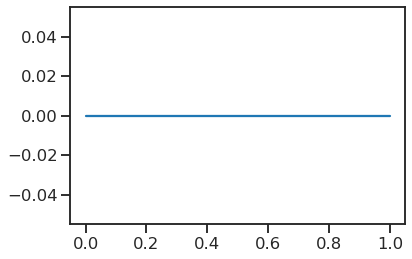

In [154]:
trace.varnames

['x_lengthscale_log__',
 'y_variance_log__',
 'y_mean',
 'sample_age',
 'sample_rsl',
 'gmsl_rotated_',
 'x_lengthscale',
 'y_variance',
 'gia',
 'gmsl',
 'residual']

In [130]:
with model:
    gmsl_pred = gp.conditional("gmsl_pred", TIME[:,None])
    pred_samples = pm.sample_posterior_predictive(trace, vars=[gmsl_pred], samples=2000)

/home/blake/anaconda3/envs/jupyterbase/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/blake/anaconda3/envs/jupyterbase/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
  0%|          | 0/2000 [00:00<?, ?it/s]/home/blake/anaconda3/envs/jupyterbase/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futu

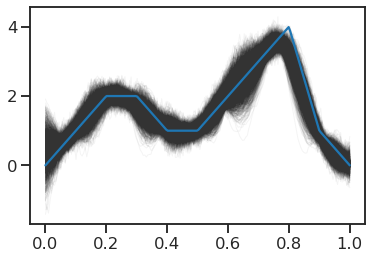

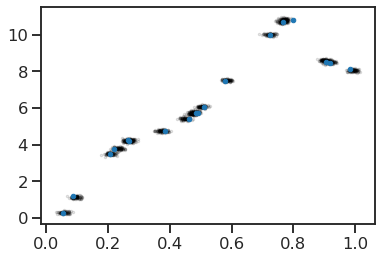

In [347]:
for i in range(100):
    plt.plot(sample_age.random(),sample_rsl.random(),'.',alpha=.1,color='k',markersize=5)
    
plt.plot(trace['sample_age'][0],trace['sample_rsl'][0],'.')

In [209]:
trace['sample_age'].shape

(18, 1)

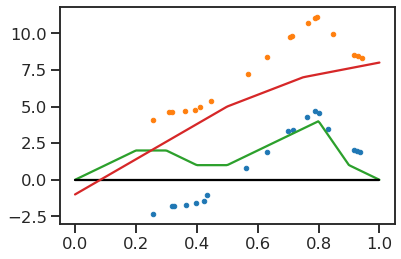

In [204]:
plt.plot(sample_age.random(),trace['gmsl'][0],'.')
plt.plot(data['age'],data['elevation'],'.')
plt.plot(TIME,GMSL)
plt.plot(TIME,RSL_fun(TIME)-GMSL-GIA,color='k')
plt.plot(TIME,GIA)

In [465]:
with pm.Model() as model2:
    GIA = np.array([1,4,4,4,3])-2
    GIA_fun = UnivariateSpline(np.linspace(0,1,len(GIA)),GIA,ext=1)

    
    sample_age = pm.Normal(
        "sample_age",
        mu=data["age"],
        sd=data["age_uncertainty"],
        shape=(N,)
    )

    sample_rsl = pm.Normal(
        "sample_rsl",
        mu=data["elevation"],
        sd=data["elevation_uncertainty"],
        shape=(N,)
    )

    gia_spline = SplineWrapper(GIA_fun)
    gia_model = pm.Deterministic("gia", gia_spline(sample_age))

    noise_sd = pm.HalfNormal("noise_sd", sd=1, shape=(N, 1))

#     gmsl_inference = pm.Normal(
#         "gmsl", mu=np.zeros(N)[:, np.newaxis], sd=noise_sd, shape=(N, 1)
#     )  # prior needs to be (n1+n2,)
    
    scale=10
    ls = pm.Gamma(
        "x_lengthscale", alpha=1, beta=1, shape=(2, 1)
    )  # lengthscale of cov for white noise and matern
    yls = pm.Gamma("y_variance", alpha=1, beta=1)  # signal variance
    meany = pm.Normal("y_mean", mu=0, sd=15)  # mean of GMSL over interval
    cov = yls * pm.gp.cov.Matern32(1, ls=ls[0]/scale) + ls[1]/scale * pm.gp.cov.WhiteNoise(1)
    mean_func = pm.gp.mean.Constant(meany)
    gp = pm.gp.Latent(mean_func=mean_func, cov_func=cov)
    gmsl_inference = gp.prior(
        "gmsl", X=sample_age[:,np.newaxis], shape=((N),)
    )  # prior needs to be (n1+n2,)

    RSL_estimate = pm.Deterministic(
        "RSL_estimate", gmsl_inference.flatten() + gia_model.flatten()
    )

    likelihood = pm.Normal(
        "zero",
        mu=RSL_estimate,
        sd=data["elevation_uncertainty"],
        observed=data["elevation"]
    )

    trace2 = pm.sample(draws=1000, tune=500, init='nuts', n_init=1000, progressbar=True)
    
#     gmsl_pred = gp.conditional("gmsl_pred",  TIME[:,None])
#     pred_samples = pm.sample_posterior_predictive(trace2, vars=[gmsl_pred], samples=2000)

warnings.resetwarnings()

/home/blake/anaconda3/envs/jupyterbase/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Auto-assigning NUTS sampler...
Initializing NUTS using nuts...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gmsl_rotated_, y_mean, y_variance, x_lengthscale, noise_sd, sample_rsl, sample_age]
Sampling 4 chains, 77 divergences: 100%|██████████| 6000/6000 [06:41<00:00, 14.93draws/s]
/home/blake/anaconda3/envs/jupyterbase/lib/python3.7/site-packages/arviz/data/io_pymc3.py:98: PendingDeprecationWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call fr

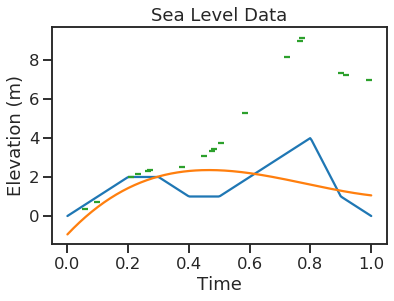

In [468]:
# for i in range(2000):
#     plt.plot(TIME,pred_samples['gmsl_pred'][i],lw=1,alpha=.05,color=(.2,.2,.2))
plt.plot(TIME,GMSL)
plt.plot(TIME,GIA_fun(TIME))

plt.errorbar(
    data["age"],
    data["elevation"]-GIA_fun(data['age']),
    xerr=data["age_uncertainty"],
    yerr=data["elevation_uncertainty"],
    linestyle="none",zorder=10,
)
plt.gca().set_xlabel('Time')
plt.gca().set_ylabel('Elevation (m)')
_=plt.gca().set_title('Sea Level Data')

In [374]:
warnings.filterwarnings("ignore")

with pm.Model() as model1:
    GIA = np.array([1,4,7,9,10])-2
    GIA_fun = UnivariateSpline(np.linspace(0,1,len(GIA)),GIA,ext=1)

    
    sample_age = pm.Normal(
        "sample_age",
        mu=data["age"],
        sd=data["age_uncertainty"],
        shape=(N,)
    )

    sample_rsl = pm.Normal(
        "sample_rsl",
        mu=data["elevation"],
        sd=data["elevation_uncertainty"],
        shape=(N,)
    )

    gia_spline = SplineWrapper(GIA_fun)
    gia_model = pm.Deterministic("gia", gia_spline(sample_age))
    
    scale=10
    ls = pm.Gamma(
        "x_lengthscale", alpha=1, beta=1, shape=(2, 1)
    )  # lengthscale of cov for white noise and matern
    yls = pm.Gamma("y_variance", alpha=1, beta=1)  # signal variance
    meany = pm.Normal("y_mean", mu=0, sd=15)  # mean of GMSL over interval
    cov = yls * pm.gp.cov.Matern32(1, ls=ls[0]/scale) + ls[1]/scale * pm.gp.cov.WhiteNoise(1)
    mean_func = pm.gp.mean.Constant(meany)
    gp = pm.gp.Latent(mean_func=mean_func, cov_func=cov)
    gmsl_inference = gp.prior(
        "gmsl", X=sample_age[:,np.newaxis], shape=((N),)
    )  # prior needs to be (n1+n2,)

    RSL_estimate = pm.Deterministic(
        "RSL_estimate", gmsl_inference.flatten() + gia_model.flatten()
    )

    likelihood = pm.Normal(
        "zero",
        mu=RSL_estimate,
        sd=data["elevation_uncertainty"],
        observed=data["elevation"]
    )

    trace1 = pm.sample(draws=1000, tune=500, init='nuts', n_init=1000, progressbar=True)
    
#     gmsl_pred = gp.conditional("gmsl_pred",  TIME[:,None])
#     pred_samples = pm.sample_posterior_predictive(trace1, vars=[gmsl_pred], samples=2000)

warnings.resetwarnings()

Auto-assigning NUTS sampler...
Initializing NUTS using nuts...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gmsl_rotated_, y_mean, y_variance, x_lengthscale, noise_sd, sample_rsl, sample_age]
Sampling 4 chains, 1,826 divergences: 100%|██████████| 6000/6000 [02:59<00:00, 33.39draws/s]
There were 440 divergences after tuning. Increase `target_accept` or reparameterize.
There were 425 divergences after tuning. Increase `target_accept` or reparameterize.
There were 459 divergences after tuning. Increase `target_accept` or reparameterize.
There were 500 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gmsl_rotated_, y_mean, y_variance, x_lengthscale, noise_sd, sample_rsl, sample_age]
Sampling 4 chains, 3,401 divergences: 100%|██████████| 6000/6000 [05:23<00:00, 18.57draws/s] 
The chain contains only diverging samples. The model is probably miss

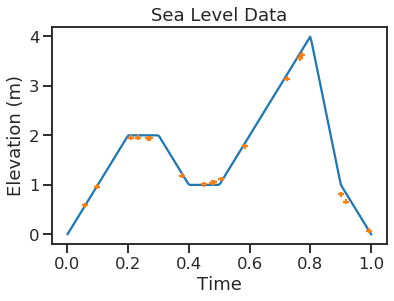

In [463]:
# for i in range(2000):
#     plt.plot(TIME,pred_samples['gmsl_pred'][i],lw=1,alpha=.05,color=(.2,.2,.2))
plt.plot(TIME,GMSL)

plt.errorbar(
    data["age"],
    data["elevation"]-GIA_fun(data['age']),
    xerr=data["age_uncertainty"],
    yerr=data["elevation_uncertainty"],
    linestyle="none",zorder=10,
)
plt.gca().set_xlabel('Time')
plt.gca().set_ylabel('Elevation (m)')
_=plt.gca().set_title('Sea Level Data')


bayesian vs freq model selection:
> https://jakevdp.github.io/blog/2015/08/07/frequentism-and-bayesianism-5-model-selection/

model averaging

> https://docs.pymc.io/notebooks/model_averaging.html

> https://arxiv.org/abs/1704.02030

What makes a model better?
The observed sea level should match when corrected for GIA. Will this 'matching' show up in the marginal likelihood of the GP?
Imagine two datapoints with the same age, but 2 meters apart.
Another GIA model brings those two datapoints together.
Will the marginal likelihood of the second model be better than the first?

In [469]:
# traces=[trace1,trace2]
# model_dict = dict(zip([model1, model2], traces))
comp = pm.stats.compare({model1: trace1, model2: trace2})
comp

/home/blake/anaconda3/envs/jupyterbase/lib/python3.7/site-packages/arviz/data/io_pymc3.py:98: PendingDeprecationWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  PendingDeprecationWarning,
/home/blake/anaconda3/envs/jupyterbase/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/blake/anaconda3/envs/jupyterbase/lib/python3.7/site-packages/arviz/stats/stats.py:532: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
<pymc3.model.Model object at 0x7fdb57ab52d0>,0,-21605.1,17701.6,0,NaN,151.952,0,True,log
<pymc3.model.Model object at 0x7fdb58434310>,1,-25874.1,7192.61,4269.01,0,165.851,222.919,True,log


In [389]:
J = 8
y = np.array([28,  8, -3,  7, -1,  1, 18, 12])
sigma = np.array([15, 10, 16, 11,  9, 11, 10, 18])

with pm.Model() as pooled:
    mu = pm.Normal('mu', 0, sigma=1e6)

    obs = pm.Normal('obs', mu, sigma=sigma, observed=y)

    trace_p = pm.sample(1000)
    
with pm.Model() as hierarchical:

    eta = pm.Normal('eta', 0, 1, shape=J)
    mu = pm.Normal('mu', 0, sigma=1e6)
    tau = pm.HalfCauchy('tau', 5)

    theta = pm.Deterministic('theta', mu + tau*eta)

    obs = pm.Normal('obs', theta, sigma=sigma, observed=y)

    trace_h = pm.sample(1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:00<00:00, 10712.39draws/s]
/home/blake/anaconda3/envs/jupyterbase/lib/python3.7/site-packages/arviz/data/io_pymc3.py:98: PendingDeprecationWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  PendingDeprecationWarning,
/home/blake/anaconda3/envs/jupyterbase/lib/python3.7/site-packages/arviz/data/io_pymc3.py:98: PendingDeprecationWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  PendingDeprecationWarning,
Auto-assigning NUTS sa

In [393]:
df_comp_WAIC = pm.compare({hierarchical: trace_h, pooled: trace_p})
df_comp_WAIC

/home/blake/anaconda3/envs/jupyterbase/lib/python3.7/site-packages/arviz/data/io_pymc3.py:98: PendingDeprecationWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  PendingDeprecationWarning,


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
<pymc3.model.Model object at 0x7fdb65acea10>,0,-30.5404,0.659433,0,0.548378,0.939191,0,False,log
<pymc3.model.Model object at 0x7fdb65ace210>,1,-30.7357,1.03596,0.19531,0.451622,1.0312,0.116499,False,log


In [409]:
trace_h.varnames

['eta', 'mu', 'tau_log__', 'tau', 'theta']

In [399]:
import arviz as az

az.compare({'1':az.convert_to_inference_data(trace1),'2':az.convert_to_inference_data(trace2)})

TypeError: log likelihood not found in inference data object

In [428]:
A=az.convert_to_inference_data(trace1, model=model1)
az.waic(A)

TypeError: log likelihood not found in inference data object

In [454]:
model.observed_RVs[0]

zero

In [453]:
model.observed_RVs[0].logp_elemwise()

TypeError: Missing required input: sample_age

In [449]:
model.observed_RVs[0].logp_elemwise([trace['sample_age'],trace['sample_rsl']])

TypeError: can't turn [[array([[0.91784486, 0.79704821, 0.26874419, ..., 0.2191922 , 0.7660023 ,
        0.20698176],
       [0.92159993, 0.78487086, 0.26418269, ..., 0.22860972, 0.78095031,
        0.2136886 ],
       [0.92434508, 0.79482944, 0.27142419, ..., 0.21434356, 0.76354378,
        0.19654158],
       ...,
       [0.90624606, 0.76252217, 0.25868621, ..., 0.23129025, 0.75045391,
        0.2136061 ],
       [0.90027393, 0.76232208, 0.25475255, ..., 0.23233645, 0.75397517,
        0.21324057],
       [0.89864451, 0.76205901, 0.25437876, ..., 0.229693  , 0.75166195,
        0.21175571]]), array([[ 8.47440801, 10.8147049 ,  4.21956274, ...,  3.78620476,
        10.70789664,  3.48670282],
       [ 8.46187513, 10.82815355,  4.23816345, ...,  3.80313565,
        10.71865734,  3.48000474],
       [ 8.47686272, 10.87366312,  4.28364944, ...,  3.82588179,
        10.71040308,  3.47354386],
       ...,
       [ 8.45348023, 10.87064747,  4.21930112, ...,  3.86076001,
        10.65629751,  3.4270312 ],
       [ 8.469193  , 10.89807739,  4.22292089, ...,  3.84294848,
        10.65227706,  3.43532867],
       [ 8.46886807, 10.89982695,  4.22680309, ...,  3.84232992,
        10.65206502,  3.43630495]])]] and {} into a dict. dictionary update sequence element #0 has length 4000; 2 is required

In [418]:
az.convert_to_inference_data(pred_samples, log_likelihood=['gmsl_pred'])

Inference data with groups:
	> posterior

TypeError: waic() got an unexpected keyword argument 'log_likelihood'

In [403]:
A.posterior

<xarray.Dataset>
Dimensions:              (RSL_estimate_dim_0: 18, chain: 4, draw: 1000, gia_dim_0: 18, gmsl_dim_0: 18, gmsl_rotated__dim_0: 18, noise_sd_dim_0: 18, noise_sd_dim_1: 1, sample_age_dim_0: 18, sample_rsl_dim_0: 18, x_lengthscale_dim_0: 2, x_lengthscale_dim_1: 1)
Coordinates:
  * chain                (chain) int64 0 1 2 3
  * draw                 (draw) int64 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
  * sample_age_dim_0     (sample_age_dim_0) int64 0 1 2 3 4 5 ... 13 14 15 16 17
  * sample_rsl_dim_0     (sample_rsl_dim_0) int64 0 1 2 3 4 5 ... 13 14 15 16 17
  * gmsl_rotated__dim_0  (gmsl_rotated__dim_0) int64 0 1 2 3 4 ... 14 15 16 17
  * gia_dim_0            (gia_dim_0) int64 0 1 2 3 4 5 6 ... 12 13 14 15 16 17
  * noise_sd_dim_0       (noise_sd_dim_0) int64 0 1 2 3 4 5 ... 13 14 15 16 17
  * noise_sd_dim_1       (noise_sd_dim_1) int64 0
  * x_lengthscale_dim_0  (x_lengthscale_dim_0) int64 0 1
  * x_lengthscale_dim_1  (x_lengthscale_dim_1) int64 0
  * gmsl_dim_0           (gmsl_dim_0) int64 0 1 2 3 4 5 6 ... 12 13 14 15 16 17
  * RSL_estimate_dim_0   (RSL_estimate_dim_0) int64 0 1 2 3 4 ... 13 14 15 16 17
Data variables:
    sample_age           (chain, draw, sample_age_dim_0) float64 0.9124 ... 0.1994
    sample_rsl           (chain, draw, sample_rsl_dim_0) float64 8.471 ... 3.409
    y_mean               (chain, draw) float64 0.5118 0.5121 ... 1.547 1.555
    gmsl_rotated_        (chain, draw, gmsl_rotated__dim_0) float64 0.2556 ... -0.5867
    gia                  (chain, draw, gia_dim_0) float64 7.83 7.222 ... 1.437
    noise_sd             (chain, draw, noise_sd_dim_0, noise_sd_dim_1) float64 0.856 ... 0.7579
    x_lengthscale        (chain, draw, x_lengthscale_dim_0, x_lengthscale_dim_1) float64 1.613 ... 0.001911
    y_variance           (chain, draw) float64 0.814 0.8134 ... 1.632 1.611
    gmsl                 (chain, draw, gmsl_dim_0) float64 0.7434 ... 1.935
    RSL_estimate         (chain, draw, RSL_estimate_dim_0) float64 8.573 ... 3.372
Attributes:
    created_at:                 2020-05-06T22:52:14.200153
    arviz_version:              0.7.0
    inference_library:          pymc3
    inference_library_version:  3.8

In [365]:

model_dict = dict(zip([model_0, model_1, model_2], traces))
comp = pm.compare(model_dict, method='BB-pseudo-BMA')



/home/blake/anaconda3/envs/jupyterbase/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


TypeError: __call__() missing 1 required positional argument: 'x'

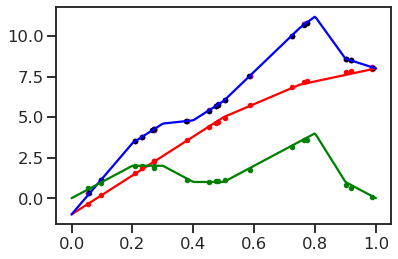

In [346]:
plt.plot(np.mean(trace['sample_age'],axis=0),np.mean(trace['sample_rsl'],axis=0),'b.')
plt.plot(np.mean(trace['sample_age'],axis=0),np.mean(trace['gmsl'],axis=0),'g.')
plt.plot(np.mean(trace['sample_age'],axis=0),np.mean(trace['gia'],axis=0),'r.')
plt.plot(np.mean(trace['sample_age'],axis=0),np.mean(trace['RSL_estimate'],axis=0),'m.')


plt.plot(data["age"],data["elevation"],'k.')
# plt.plot(data["age"],np.mean(trace['gmsl'],axis=0),'g.')
# plt.plot(data["age"],np.mean(trace['gia'],axis=0),'r.')
# plt.plot(data["age"],np.mean(trace['RSL_estimate'],axis=0),'m.')


plt.plot(TIME,GIA,'r')
plt.plot(TIME,RSL_fun(TIME),'b')
plt.plot(TIME,GMSL,'g')


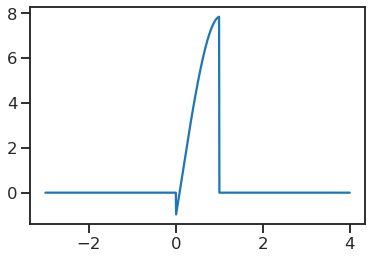

What makes a model better?
The observed sea level should match when corrected for GIA. Will this 'matching' show up in the marginal likelihood of the GP?
Imagine two datapoints with the same age, but 2 meters apart.
Another GIA model brings those two datapoints together.
Will the marginal likelihood of the second model be better than the first?

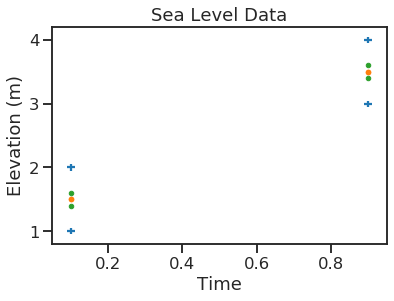

In [581]:
RSL = np.array([1,2,3,4])
GIA1 = np.array([.5,-.5,.5,-.5])
GIA2 = np.array([.6,-.6,.4,-.4])
AGE = np.array([0.1,0.1,.9,.9])

N = 4
data = {}
data["age"] = AGE
data["age_uncertainty"] = np.array([0.01] * data["age"].size)
data["elevation"] = RSL
data["elevation_uncertainty"] = np.array([0.05] * data["elevation"].size)

plt.errorbar(
    data["age"],
    data["elevation"],
    xerr=data["age_uncertainty"],
    yerr=data["elevation_uncertainty"],
    linestyle="none",
)
plt.plot(AGE,RSL+GIA1,'.')
plt.plot(AGE,RSL+GIA2,'.')
plt.gca().set_xlabel('Time')
plt.gca().set_ylabel('Elevation (m)')
_=plt.gca().set_title('Sea Level Data')

In [582]:
warnings.filterwarnings("ignore")

with pm.Model() as model1:
    GIA = GIA1
       
    sample_age = pm.Normal(
        "sample_age",
        mu=data["age"],
        sd=data["age_uncertainty"],
        shape=(N,)
    )

    sample_rsl = pm.Normal(
        "sample_rsl",
        mu=data["elevation"],
        sd=data["elevation_uncertainty"],
        shape=(N,)
    )

    scale=10
    ls = pm.Gamma(
        "x_lengthscale", alpha=1, beta=1, shape=(2, 1)
    )  # lengthscale of cov for white noise and matern
    yls = pm.Gamma("y_variance", alpha=1, beta=1)  # signal variance
    meany = pm.Normal("y_mean", mu=0, sd=15)  # mean of GMSL over interval
    cov = yls * pm.gp.cov.Matern32(1, ls=ls[0]/scale) + ls[1]/scale * pm.gp.cov.WhiteNoise(1)
    mean_func = pm.gp.mean.Constant(meany)
    gp = pm.gp.Latent(mean_func=mean_func, cov_func=cov)
    gmsl_inference = gp.prior(
        "gmsl", X=sample_age[:,np.newaxis], shape=((N),)
    )  # prior needs to be (n1+n2,)

    RSL_estimate = pm.Deterministic(
        "RSL_estimate", gmsl_inference.flatten() + GIA.flatten()
    )

    likelihood = pm.Normal(
        "zero",
        mu=RSL_estimate,
        sd=data["elevation_uncertainty"],
        observed=data["elevation"]
    )

    trace1 = pm.sample(draws=1000, tune=500, init='nuts', n_init=2000, progressbar=True)
    
    az_trace1=az.convert_to_inference_data(trace1)
    
    gmsl_pred1 = gp.conditional("gmsl_pred",  TIME[:,None])
    pred_samples1 = pm.sample_posterior_predictive(trace1, vars=[gmsl_pred1], samples=2000)

warnings.resetwarnings()

Auto-assigning NUTS sampler...
Initializing NUTS using nuts...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gmsl_rotated_, y_mean, y_variance, x_lengthscale, sample_rsl, sample_age]
Sampling 4 chains, 705 divergences: 100%|██████████| 12000/12000 [02:46<00:00, 72.19draws/s]
There were 73 divergences after tuning. Increase `target_accept` or reparameterize.
There were 409 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5681147942618805, but should be close to 0.8. Try to increase the number of tuning steps.
There were 98 divergences after tuning. Increase `target_accept` or reparameterize.
There were 125 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Multiprocess sampling (4 chains in 4 jo

In [583]:
warnings.filterwarnings("ignore")

with pm.Model() as model2:
    GIA = GIA2
       
    sample_age = pm.Normal(
        "sample_age",
        mu=data["age"],
        sd=data["age_uncertainty"],
        shape=(N,)
    )

    sample_rsl = pm.Normal(
        "sample_rsl",
        mu=data["elevation"],
        sd=data["elevation_uncertainty"],
        shape=(N,)
    )

    scale=10
    ls = pm.Normal(
        "white_noise", mu=0, sd=5
    )  # lengthscale of cov for white noise and matern
    yls = pm.Gamma("y_variance", alpha=1, beta=1)  # signal variance
    meany = pm.Normal("y_mean", mu=0, sd=15)  # mean of GMSL over interval
    cov = yls * pm.gp.cov.Matern32(1, ls=.1) + ls**2 * pm.gp.cov.WhiteNoise(1)
    mean_func = pm.gp.mean.Constant(meany)
    gp = pm.gp.Latent(mean_func=mean_func, cov_func=cov)
    gmsl_inference = gp.prior(
        "gmsl", X=sample_age[:,np.newaxis], shape=((N),)
    )  # prior needs to be (n1+n2,)

    RSL_estimate = pm.Deterministic(
        "RSL_estimate", gmsl_inference.flatten() + GIA.flatten()
    )

    likelihood = pm.Normal(
        "zero",
        mu=RSL_estimate,
        sd=data["elevation_uncertainty"],
        observed=data["elevation"]
    )

    trace2 = pm.sample(draws=1000, tune=500, init='nuts', n_init=2000, progressbar=True)
    
    az_trace2=az.convert_to_inference_data(trace2)
    
    gmsl_pred2 = gp.conditional("gmsl_pred",  TIME[:,None])
    pred_samples2 = pm.sample_posterior_predictive(trace2, vars=[gmsl_pred2], samples=2000)

warnings.resetwarnings()

Auto-assigning NUTS sampler...
Initializing NUTS using nuts...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gmsl_rotated_, y_mean, y_variance, x_lengthscale, sample_rsl, sample_age]
Sampling 4 chains, 360 divergences: 100%|██████████| 12000/12000 [02:50<00:00, 70.53draws/s]
There were 65 divergences after tuning. Increase `target_accept` or reparameterize.
There were 85 divergences after tuning. Increase `target_accept` or reparameterize.
There were 78 divergences after tuning. Increase `target_accept` or reparameterize.
There were 132 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7215898680328025, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gmsl_rotated_, y_mean, y_variance, x_lengthscale, sample_rsl, sample_age]
Sampling 4 chains, 181 divergences

In [585]:
comp = pm.compare(
    {
        "model1": az_trace1,
        "model2": az_trace2,
    },ic='waic',
    method="pseudo-BMA",
)
comp

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model1,0,-421920,420698,0,1,4406.06,0,True,log
model2,1,-2.03369e+06,2.03276e+06,1.61177e+06,0,6894.1,9446.46,True,log


model1 should be slightly better

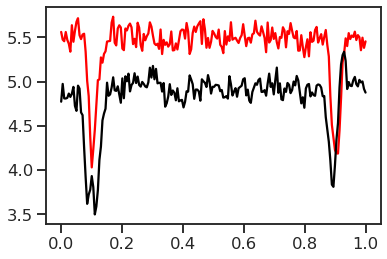

In [596]:
plt.plot(TIME,np.percentile(pred_samples1['gmsl_pred'],95,axis=0)-np.percentile(pred_samples1['gmsl_pred'],5,axis=0),'r')


plt.plot(TIME,np.percentile(pred_samples2['gmsl_pred'],95,axis=0)-np.percentile(pred_samples2['gmsl_pred'],5,axis=0),'k')


In [597]:
np.trapz(np.percentile(pred_samples2['gmsl_pred'],95,axis=0)-np.percentile(pred_samples2['gmsl_pred'],5,axis=0))


960.5661389221127

In [598]:
np.trapz(np.percentile(pred_samples1['gmsl_pred'],95,axis=0)-np.percentile(pred_samples1['gmsl_pred'],5,axis=0))

1076.9812160853799

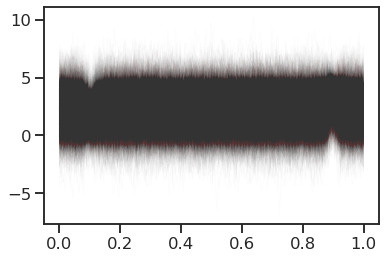

In [586]:
for i in range(2000):
    plt.plot(TIME,pred_samples1['gmsl_pred'][i],lw=1,alpha=.01,color=(.2,.2,.2))
    plt.plot(TIME,pred_samples2['gmsl_pred'][i],lw=1,alpha=.01,color=(.4,.2,.2))

In [499]:
 gmsl_pred = gp.conditional("gmsl_pred",  TIME[:,None])
#     pred_samples = pm.sample_posterior_predictive(trace1, vars=[gmsl_pred], samples=2000)

In [517]:
ppc_w = pm.sample_posterior_predictive_w([trace1,trace2], models=[model1, model2], vars=[gmsl_pred,], samples=1000, 
                        weights=[0,1],
                        progressbar=True)

TypeError: sample_posterior_predictive_w() got an unexpected keyword argument 'vars'

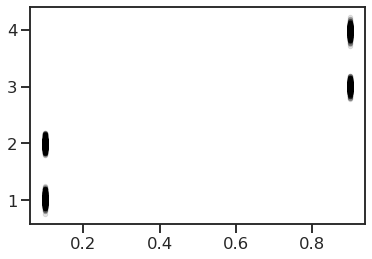

In [513]:
for i in range(1000):
    plt.plot(AGE,ppc_w['zero'][i,:],'.',color='k',alpha=.1)

In [511]:
comp.weight.sort_index(ascending=True)

model1    1
model2    0
Name: weight, dtype: object

In [519]:
pm.sample_posterior_predictive_w??

In [554]:
with model1:
#     gmsl_pred = gp.conditional("gmsl_pred",  TIME[:,None])
    pred_samples1 = pm.sample_posterior_predictive(trace1, vars=[RSL_estimate], samples=2000)

100%|██████████| 2000/2000 [00:01<00:00, 1101.54it/s]


In [555]:
pred_samples1

{'RSL_estimate': array([[0.74600846, 2.75134354, 2.74923682, 4.67153052],
        [0.75499414, 2.70587733, 2.7521739 , 4.57205925],
        [0.75521742, 2.69636992, 2.75916312, 4.66518578],
        ...,
        [0.63609294, 2.62104828, 2.84393921, 4.65241491],
        [0.68161648, 2.80197976, 2.87165437, 4.50957615],
        [0.6820831 , 2.68307793, 2.87283085, 4.67252379]])}

In [560]:
az.from_pymc3(trace1, model=model1, log_likelihood=['sample_rsl']).log_likelihood

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    created_at:                 2020-05-07T01:09:10.814431
    arviz_version:              0.7.0
    inference_library:          pymc3
    inference_library_version:  3.8

In [543]:
with model2:
#     gmsl_pred = gp.conditional("gmsl_pred",  TIME[:,None])
    pred_samples2 = pm.sample_posterior_predictive(trace1, vars=[gmsl_pred], samples=2000)

100%|██████████| 2000/2000 [00:21<00:00, 93.73it/s]


In [547]:
test = pm.compare(
    {
        "model1": az.from_pymc3(trace1, model=model1, log_likelihood=trace1),
        "model2": az.from_pymc3(trace2, model=model2, log_likelihood=trace2),
    },ic='waic',
    method="pseudo-BMA",
)
test

TypeError: log likelihood not found in inference data object

https://github.com/arviz-devs/arviz/issues/925#issuecomment-560014504

comment on how to make arbiz and posterior work nicely together

In [ ]:
gmsl + gia = obs
gmsl + gia - obs = 0

In [65]:
data["age_uncertainty"].shape

(8, 1)

In [85]:
data["age_uncertainty"]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [122]:
from pymc3.distributions.dist_math import SplineWrapper
import theano.tensor as tt
from theano.compile.ops import as_op



with pm.Model():
    sample_age = pm.Normal(
        "sample_age",
        mu=data["age"][:, np.newaxis],
        sd=data["age_uncertainty"][:, np.newaxis],
        shape=(N, 1),
    )
    sample_rsl = pm.Normal(
        "sample_rsl",
        mu=data["elevation"][:, np.newaxis],
        sd=data["elevation_uncertainty"][:, np.newaxis],
        shape=(N, 1),
    )
    gia_spline = SplineWrapper(GIA_fun)
    gia_model = pm.Deterministic("gia", gia_spline(sample_age))

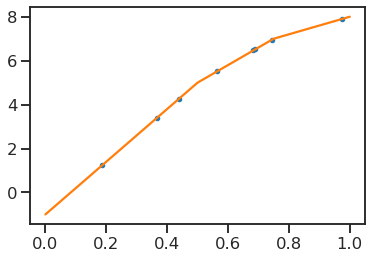

In [110]:
plt.plot(sample_age.tag.test_value,gia_model.tag.test_value,'.')
plt.plot(TIME,GIA)

In [118]:
from pymc3.distributions.dist_math import SplineWrapper
with pm.Model():
    test=Interpolated('test',TIME,GIA)
    d = pm.Deterministic('d',test(.5))

TypeError: 'TransformedRV' object is not callable

In [180]:
from pymc3.distributions.dist_math import SplineWrapper

In [181]:
SplineWrapper??